In [1]:
!pip install torch==1.7.0 # Few errors will come but don't bother

     |████████████████████████████████| 776.7 MB 4.7 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.9.0+cu102
    Uninstalling torch-1.9.0+cu102:
      Successfully uninstalled torch-1.9.0+cu102
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.10.0+cu102 requires torch==1.9.0, but you have torch 1.7.0 which is incompatible.
torchtext 0.10.0 requires torch==1.9.0, but you have torch 1.7.0 which is incompatible.


In [2]:

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
plt.style.use('default')
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error as MSE

import matplotlib.pyplot as plt
import math as mt


In [3]:
torch.set_printoptions(precision=12)
print(torch.__version__)

1.7.0


In [4]:
series1 = pd.read_csv('/content/Input_RNN.csv')
temp = pd.read_csv('/content/Output_RNN .csv')


################ for checking model performance on noisy data ###################

# series1 = pd.read_csv('/content/noise input.csv')
# temp = pd.read_csv('/content/noise output.csv')

################ ################ ################ ################ ################ ################ 


temp = np.asarray(temp)
series1 = np.asarray(series1)

print('Length of the total dataset:',len(series1))

series = series1[:15000]
series_test = series1[15000:16666]
series_temp = temp[:15000]
series_test_temp = temp[15000:16666]

#######################################################
estimated_using_1stprinciple = pd.read_csv('/content/FourTank+-+State+estimation+using+1st+principle.csv')
estimated_using_1stprinciple = np.array(estimated_using_1stprinciple)
#######################################################

######################## EXTRA FILES ADDING FOR ESTIMATOR #######################

plant_measurement = pd.read_csv('/content/measurement_states_with_measurementnoise.csv')
states_with_noise = pd.read_csv('/content/State_processnoise.csv')


plant_measurement = np.array(plant_measurement)
states_with_noise = np.array(states_with_noise)

series_plantmeasurement = plant_measurement[:15000]
series_statewithnoise = states_with_noise[:15000]

series_test_plantmeasurement = plant_measurement[15000:16666]
series_test_statewithnoise = states_with_noise[15000:16666]

Length of the total dataset: 20000


## Run only 1 time else mean and std value will be 0 and 1 

In [5]:
# INPUT
scaler = preprocessing.StandardScaler()
# normalizing series (TRAIN,validation,test)################
mean_input1 = series[:13333,0].mean()
std_input1 = series[:13333,0].std()

mean_input2 = series[:13333,1].mean()
std_input2 = series[:13333,1].std()

mean_input3 = series[:13333,2].mean()
std_input3 = series[:13333,2].std()

mean_input4 = series[:13333,3].mean()
std_input4 = series[:13333,3].std()

mean_input5 = series[:13333,4].mean()
std_input5 = series[:13333,4].std()

mean_input6 = series[:13333,5].mean()
std_input6 = series[:13333,5].std()


#Output meand & std
mean_output1 = series_temp[:13333,0].mean()
std_output1 = series_temp[:13333,0].std()
mean_EKF_output1 = series_statewithnoise[:13333,0].mean()
std_EKF_output1 = series_statewithnoise[:13333,0].std()

mean_output2 = series_temp[:13333,1].mean()
std_output2 = series_temp[:13333,1].std()
mean_EKF_output2 = series_statewithnoise[:13333,1].mean()
std_EKF_output2 = series_statewithnoise[:13333,1].std()

mean_output3 = series_temp[:13333,2].mean()
std_output3 = series_temp[:13333,2].std()
mean_EKF_output3 = series_statewithnoise[:13333,2].mean()
std_EKF_output3 = series_statewithnoise[:13333,2].std()

mean_output4 = series_temp[:13333,3].mean()
std_output4 = series_temp[:13333,3].std()
mean_EKF_output4 = series_statewithnoise[:13333,3].mean()
std_EKF_output4 = series_statewithnoise[:13333,3].std()





series[:13333,0] = scaler.fit_transform(series[:13333,0].reshape(-1,1)).reshape(-1)
series[13333:,0] = scaler.transform(series[13333:,0].reshape(-1,1)).reshape(-1)     #for validation for same column
series_test[:,0] = scaler.transform(series_test[:,0].reshape(-1,1)).reshape(-1)     # for test for same column


series[:13333,1] = scaler.fit_transform(series[:13333,1].reshape(-1,1)).reshape(-1)
series[13333:,1] = scaler.transform(series[13333:,1].reshape(-1,1)).reshape(-1)
series_test[:,1] = scaler.transform(series_test[:,1].reshape(-1,1)).reshape(-1)


series[:13333,2] = scaler.fit_transform(series[:13333,2].reshape(-1,1)).reshape(-1)
series[13333:,2] = scaler.transform(series[13333:,2].reshape(-1,1)).reshape(-1)
series_test[:,2] = scaler.transform(series_test[:,2].reshape(-1,1)).reshape(-1)



series[:13333,3] = scaler.fit_transform(series[:13333,3].reshape(-1,1)).reshape(-1)
series[13333:,3] = scaler.transform(series[13333:,3].reshape(-1,1)).reshape(-1)
series_test[:,3] = scaler.transform(series_test[:,3].reshape(-1,1)).reshape(-1)


series[:13333,4] = scaler.fit_transform(series[:13333,4].reshape(-1,1)).reshape(-1)
series[13333:,4] = scaler.transform(series[13333:,4].reshape(-1,1)).reshape(-1)
series_test[:,4] = scaler.transform(series_test[:,4].reshape(-1,1)).reshape(-1)


series[:13333,5] = scaler.fit_transform(series[:13333,5].reshape(-1,1)).reshape(-1)
series[13333:,5] = scaler.transform(series[13333:,5].reshape(-1,1)).reshape(-1)
series_test[:,5] = scaler.transform(series_test[:,5].reshape(-1,1)).reshape(-1)




# OUTPUT

# normalizing series (TRAIN,validation,test)################

series_temp[:13333,0] = scaler.fit_transform(series_temp[:13333,0].reshape(-1,1)).reshape(-1)
series_temp[13333:,0] = scaler.transform(series_temp[13333:,0].reshape(-1,1)).reshape(-1)       #for validation of same column
series_test_temp[:,0] = scaler.transform(series_test_temp[:,0].reshape(-1,1)).reshape(-1)       # for validation of same column


series_temp[:13333,1] = scaler.fit_transform(series_temp[:13333,1].reshape(-1,1)).reshape(-1)
series_temp[13333:,1] = scaler.transform(series_temp[13333:,1].reshape(-1,1)).reshape(-1)
series_test_temp[:,1] = scaler.transform(series_test_temp[:,1].reshape(-1,1)).reshape(-1)


series_temp[:13333,2] = scaler.fit_transform(series_temp[:13333,2].reshape(-1,1)).reshape(-1)
series_temp[13333:,2] = scaler.transform(series_temp[13333:,2].reshape(-1,1)).reshape(-1)
series_test_temp[:,2] = scaler.transform(series_test_temp[:,2].reshape(-1,1)).reshape(-1)


series_temp[:13333,3] = scaler.fit_transform(series_temp[:13333,3].reshape(-1,1)).reshape(-1)
series_temp[13333:,3] = scaler.transform(series_temp[13333:,3].reshape(-1,1)).reshape(-1)
series_test_temp[:,3] = scaler.transform(series_test_temp[:,3].reshape(-1,1)).reshape(-1)






#Dataloader

In [6]:
def Dataloader(seriesss,target,T,n_input,n_output):
     
     data4 = []
     output = []

     for i in range(len(seriesss)-T):
         x = seriesss[i:i+T]
         data4.append(x)

         y = target[i+T-1]
         output.append(y)

     data4 = np.asarray(data4)
     output = np.asarray(output)

     data4 = data4.reshape(-1,T,n_input)
     output = output.reshape(-1,n_output)# change when output length changes


     return data4,output

In [7]:
T=10
n_input=6
n_output=4
data,target = Dataloader(series,series_temp,T,n_input,n_output)

#Modeling

In [8]:
# Set device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


##model making (Always check activation function)

In [9]:
class SimpleRNN(nn.Module):
    def __init__(self,n_input, n_hidden, n_rnnlayers, n_outputs):
        super(SimpleRNN, self).__init__()

        torch.manual_seed(1)
        self.D = n_input
        self.M = n_hidden
        self.K = n_outputs
        #self.O = 3 
        self.L = n_rnnlayers

        # note batch_first = True
        # applies the convention that out data will be shape:
        # (num_samples, sequence length, num_features)
        # rather than :
        # (sequence_length, num_samples, num_features )

        self.rnn = nn.RNN(
            input_size = self.D,
            hidden_size = self.M,
            num_layers = self.L,
            nonlinearity = 'tanh',
            batch_first = True,
            #dropout = 0.001
        )

#########################################################
        self.fc = nn.Linear(self.M,self.K)
#########################################################

        # self.fc = nn.Linear(self.M,self.O)
        # self.final = nn.Linear(self.O,self.K)

    def forward(self,data):
        # initial hidden states

        h0 = torch.zeros(self.L,data.size(0),self.M).to(device)

        # get RNN unit output
        # out is of size (N,T,M)
        # 2nd return value is hidden states at each hidden layer
        # we don't need those right now 

        #######################out,_ = self.rnn(data,h0)

        out_h2, out_h1 = self.rnn(data,h0) # new adjustment




        # we only want h(T) at the final time step
        # N x M --> N x K

        #######################out = self.fc(out[:,-1,:])
        out = self.fc(out_h2[:,-1,:])    #new adjustment
        return out,out_h1

## Load model

### For RELU

In [10]:
# #Before using this run Simple RNN cell

# #loading entire model
# model = torch.load('model_with_Truestates_RELU_ver1.pth')
# model


### For Tanh

In [11]:
#Before using this run Simple RNN cell

#loading entire model
model = torch.load('Normalize_model_with_Truestates_TANH2.pth')
model

SimpleRNN(
  (rnn): RNN(6, 10, num_layers=2, batch_first=True)
  (fc): Linear(in_features=10, out_features=4, bias=True)
)

## SKip if loading model

In [ ]:
# Instantiate the model
model = SimpleRNN(n_input = 6, n_hidden = 10, n_rnnlayers = 2, n_outputs = 4) #changed to 2 when both state estimated
model.to(device)

## Skip Loss and Optimizer

In [ ]:
# Loss and Optimizer

criterion = nn.MSELoss()
# opt = torch.optim.Adam(model.parameters() , lr = 0.0001)

opt = torch.optim.Adam(model.parameters() , lr = 0.0001)    # checking 

##  Splitting Train and Test

In [15]:
x_train = torch.from_numpy(data[:13333].astype(np.float32))
y_train = torch.from_numpy(target[:13333].astype(np.float32))
x_test = torch.from_numpy(data[13333:].astype(np.float32))
y_test = torch.from_numpy(target[13333:].astype(np.float32))

x_train = x_train.to(device)
y_train = y_train.to(device)
x_test = x_test.to(device)
y_test = y_test.to(device)

print(f' Train input set: {type(x_train), x_train.shape}, Test input: {type(x_test), x_test.shape} ')
print(f' Train target set: {type(y_train), y_train.shape}, Test target: {type(y_test), y_test.shape} ')

 Train input set: (<class 'torch.Tensor'>, torch.Size([13333, 10, 6])), Test input: (<class 'torch.Tensor'>, torch.Size([1657, 10, 6])) 
 Train target set: (<class 'torch.Tensor'>, torch.Size([13333, 4])), Test target: (<class 'torch.Tensor'>, torch.Size([1657, 4])) 


## Skip Full gradient descent algo

In [ ]:

def fullgd (x_train,y_train, x_test,y_test,epochs,model,criterion,opt):
    loss_train = []
    loss_test = []

    for epoch in range(epochs):

        opt.zero_grad()

        output = model(x_train)
        loss = criterion(output[0], y_train)

        loss.backward()
        opt.step()

        loss_train.append(loss.item())

        with torch.no_grad():
            testoutput = model(x_test)
            losstest = criterion(testoutput[0],y_test)
            loss_test.append(losstest.item())
            
            if (epoch+1)%500 == 0:

                print(f'Epoch: {epoch+1}/{epochs}, Train loss:{loss.item(): .7f}, Validation loss:{losstest.item(): .7f}')


    return loss_train,loss_test



## Skip Training the model

In [13]:
epochs = 21000

loss_train,loss_test =fullgd(x_train,y_train, x_test,y_test,epochs,model,criterion,opt)

NameError: ignored

## Skip Loss Plots

In [ ]:
plt.plot(loss_train[:900], label='train')
plt.plot(loss_test[:900] , label='test')
plt.xlabel('Epochs')
plt.ylabel('Loss value')
plt.title('Loss vs epoch till 900 epochs')
plt.legend()

In [ ]:
plt.plot(loss_train[900:], label='train')
plt.plot(loss_test[900:] , label='test')
plt.xlabel('Epochs')
plt.ylabel('Loss value')
plt.title('Loss vs epoch: 900 to 21k epochs ')
plt.legend()

In [ ]:
plt.plot(loss_train, label='train')
plt.plot(loss_test, label='test')
plt.xlabel('Epochs')
plt.ylabel('Loss value')
plt.title('Loss vs epoch')
plt.legend()

# Skip Save model

In [14]:
#saving entire model
torch.save(model, 'Normalize_model_with_Truestates_TANH2.pth')

# # download checkpoint file
# files.download('model_with_Truestates_RELU.pth')

# Train Plots

In [16]:
#true = target[200:450]
true = y_train.detach().cpu().numpy()

# checktrain = torch.from_numpy(data[200:450].astype(np.float32))
# checktrain = checktrain.to(device)

checktrain = x_train

p = model(checktrain)
p = p[0].cpu().detach().numpy()


error_train_height1 = MSE(true[:,0],p[:,0])
error_train_height2 = MSE(true[:,1],p[:,1])
error_train_height3 = MSE(true[:,2],p[:,2])
error_train_height4 = MSE(true[:,3],p[:,3])
# error_train_conc2 = MSE(True_states2[:,0],p[:,0])
# error_train_temp2 = MSE(True_states2[:,1],p[:,1])

RMSE_height1 = np.sqrt(error_train_height1)
RMSE_height2 = np.sqrt(error_train_height2)
RMSE_height3 = np.sqrt(error_train_height3)
RMSE_height4 = np.sqrt(error_train_height4)

print(RMSE_height1)
print(RMSE_height2)
print(RMSE_height3)
print(RMSE_height4)

# print(np.sqrt(error_train_conc2))
# print(np.sqrt(error_train_temp2))


0.0062319394
0.0053924113
0.002884113
0.0032389418


### Training plots

Text(0.5, 1.0, 'Training Plot: Height 4 vs Time')

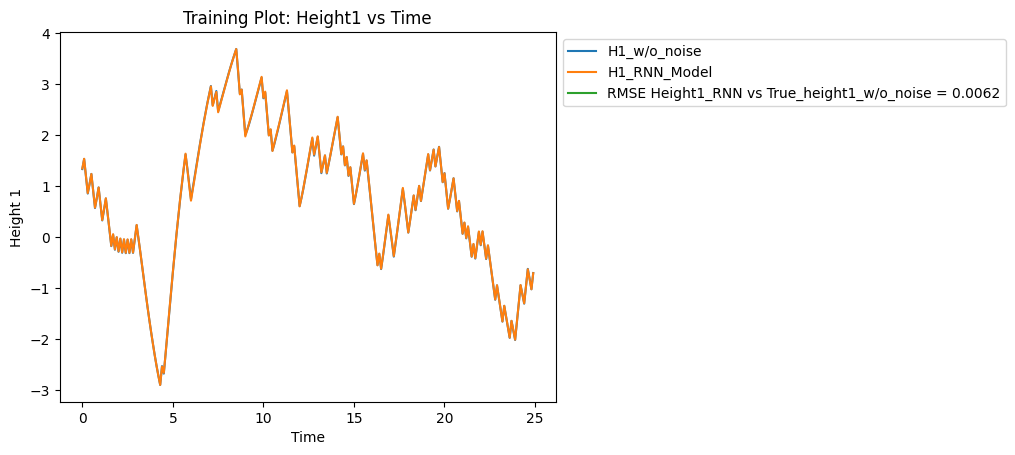

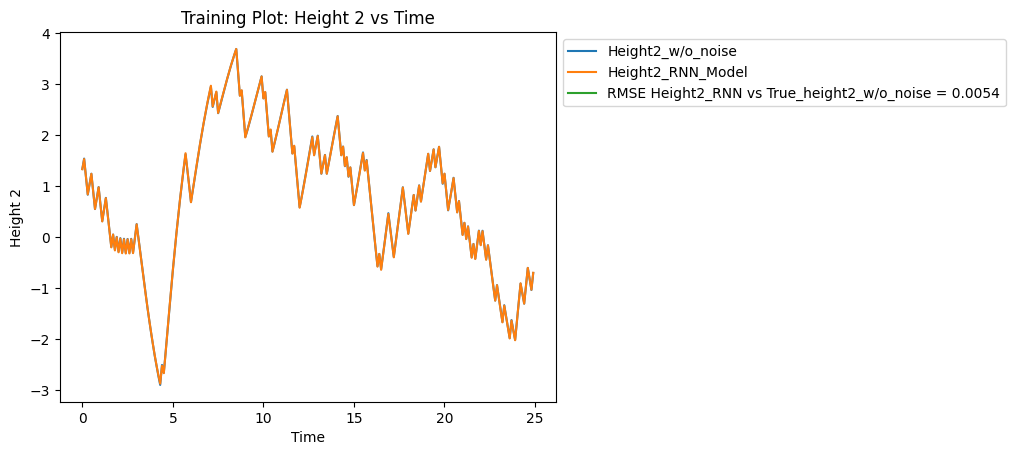

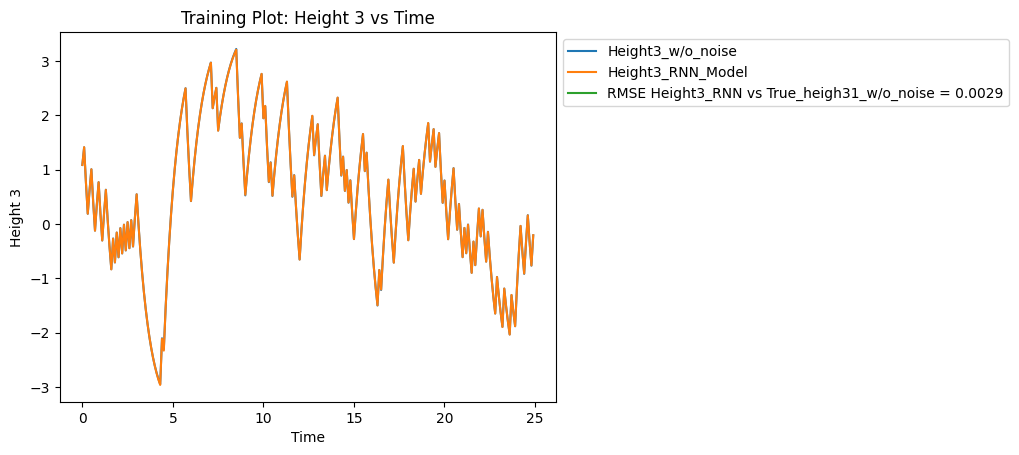

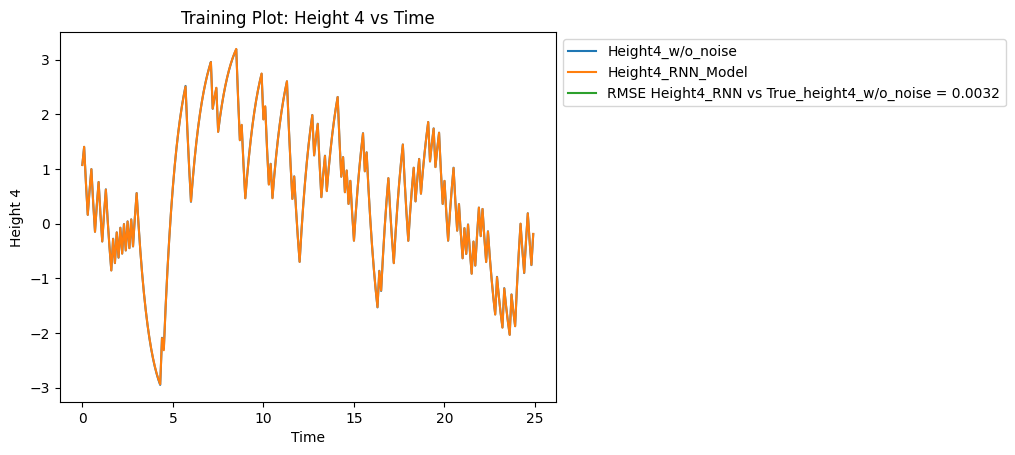

In [17]:
x = 0.1*np.arange(0,len(checktrain[200:450,0]))
plt.figure(1)
plt.plot(x,true[200:450,0], label='H1_w/o_noise')
plt.plot(x, p[200:450,0], label='H1_RNN_Model')
#plt.plot([], [], label='RMSE conc_model vs conc_w/o_noise = 0.198')
plt.plot([], [], label='RMSE Height1_RNN vs True_height1_w/o_noise = {0:.4f}'.format(RMSE_height1))
#plt.plot([], [], label='RMSE conc_model vs True_conc_w/o_noise = 0.13065')
plt.xlabel('Time')
plt.ylabel('Height 1')
plt.legend(bbox_to_anchor=(1, 1),loc='upper left')
plt.title('Training Plot: Height1 vs Time')

plt.figure(2)
plt.plot(x,true[200:450,1], label='Height2_w/o_noise')
plt.plot(x, p[200:450,1], label='Height2_RNN_Model')
#plt.plot([], [], label='RMSE Temp_model vs Temp_w/o_noise = 0.136')
#plt.plot([], [], label='RMSE Temp_model vs True_Temp = 0.1617')
plt.plot([], [], label='RMSE Height2_RNN vs True_height2_w/o_noise = {0:.4f}'.format(RMSE_height2))
plt.xlabel('Time')
plt.ylabel('Height 2')
plt.legend(bbox_to_anchor=(1, 1),loc='upper left')
plt.title('Training Plot: Height 2 vs Time')

plt.figure(3)
plt.plot(x,true[200:450,2], label='Height3_w/o_noise')
plt.plot(x, p[200:450,2], label='Height3_RNN_Model')
plt.plot([], [], label='RMSE Height3_RNN vs True_heigh31_w/o_noise = {0:.4f}'.format(RMSE_height3))
plt.xlabel('Time')
plt.ylabel('Height 3')
plt.legend(bbox_to_anchor=(1, 1),loc='upper left')
plt.title('Training Plot: Height 3 vs Time')

plt.figure(4)
plt.plot(x,true[200:450,3], label='Height4_w/o_noise')
plt.plot(x, p[200:450,3], label='Height4_RNN_Model')
#plt.plot([], [], label='RMSE Temp_model vs Temp_w/o_noise = 0.136')
#plt.plot([], [], label='RMSE Temp_model vs True_Temp = 0.1617')
plt.plot([], [], label='RMSE Height4_RNN vs True_height4_w/o_noise = {0:.4f}'.format(RMSE_height4))
plt.xlabel('Time')
plt.ylabel('Height 4')
plt.legend(bbox_to_anchor=(1, 1),loc='upper left')
plt.title('Training Plot: Height 4 vs Time')

## Inverse training plots

In [18]:
#true = target[200:450]
true = y_train.detach().cpu().numpy()

true[:,0] = true[:,0]*std_output1 + mean_output1
true[:,1] = true[:,1]*std_output2 + mean_output2
true[:,2] = true[:,2]*std_output3 + mean_output3
true[:,3] = true[:,3]*std_output4 + mean_output4

# checktrain = torch.from_numpy(data[200:450].astype(np.float32))
# checktrain = checktrain.to(device)

checktrain = x_train

p = model(checktrain)
p = p[0].cpu().detach().numpy()

p[:,0] = p[:,0]*std_output1 + mean_output1
p[:,1] = p[:,1]*std_output2 + mean_output2
p[:,2] = p[:,2]*std_output3 + mean_output3
p[:,3] = p[:,3]*std_output4 + mean_output4

error_train_height1 = MSE(true[:,0],p[:,0])
error_train_height2 = MSE(true[:,1],p[:,1])
error_train_height3 = MSE(true[:,2],p[:,2])
error_train_height4 = MSE(true[:,3],p[:,3])
# error_train_conc2 = MSE(True_states2[:,0],p[:,0])
# error_train_temp2 = MSE(True_states2[:,1],p[:,1])

RMSE_height1 = np.sqrt(error_train_height1)
RMSE_height2 = np.sqrt(error_train_height2)
RMSE_height3 = np.sqrt(error_train_height3)
RMSE_height4 = np.sqrt(error_train_height4)

print(RMSE_height1)
print(RMSE_height2)
print(RMSE_height3)
print(RMSE_height4)

# print(np.sqrt(error_train_conc2))
# print(np.sqrt(error_train_temp2))

0.005082499
0.004056824
0.0013522246
0.0011195255


Text(0.5, 1.0, 'Training Plot: Height 4 vs Time')

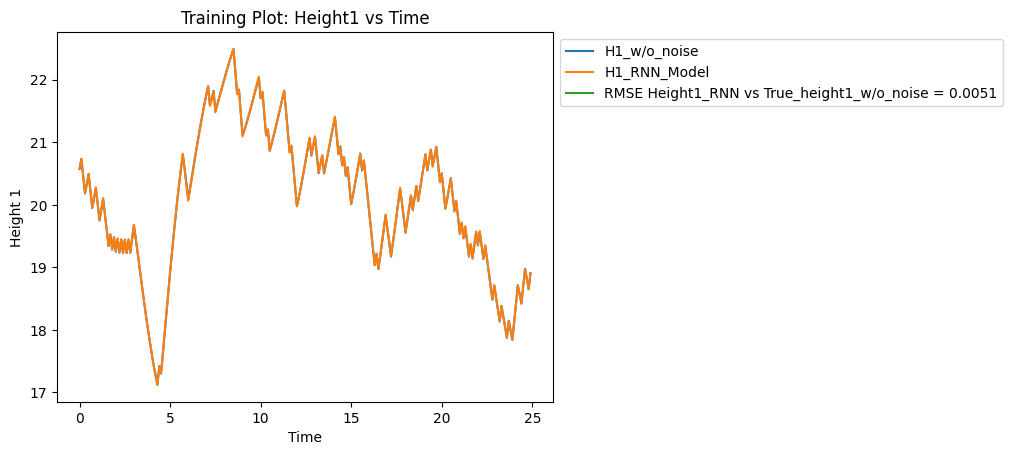

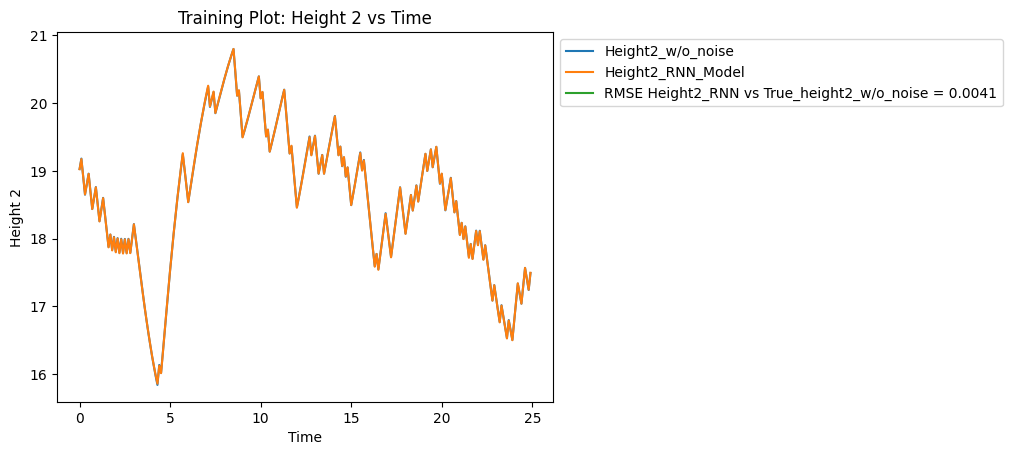

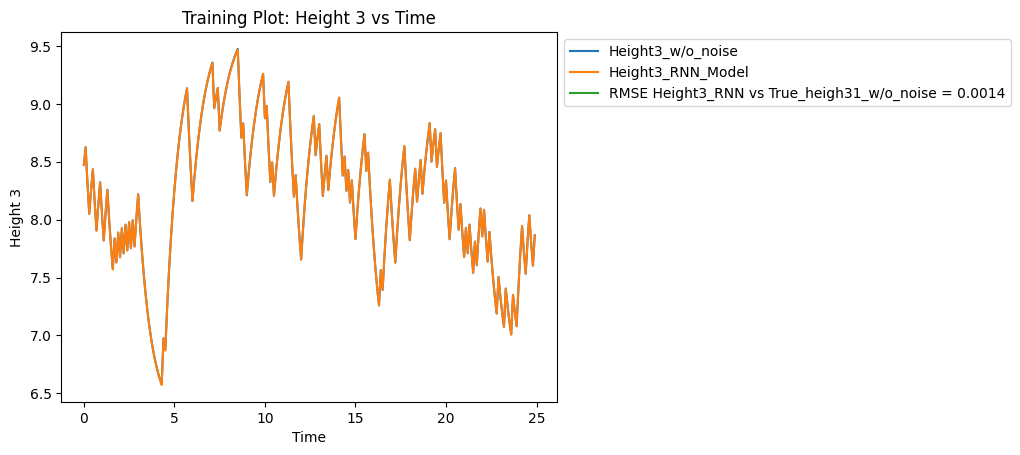

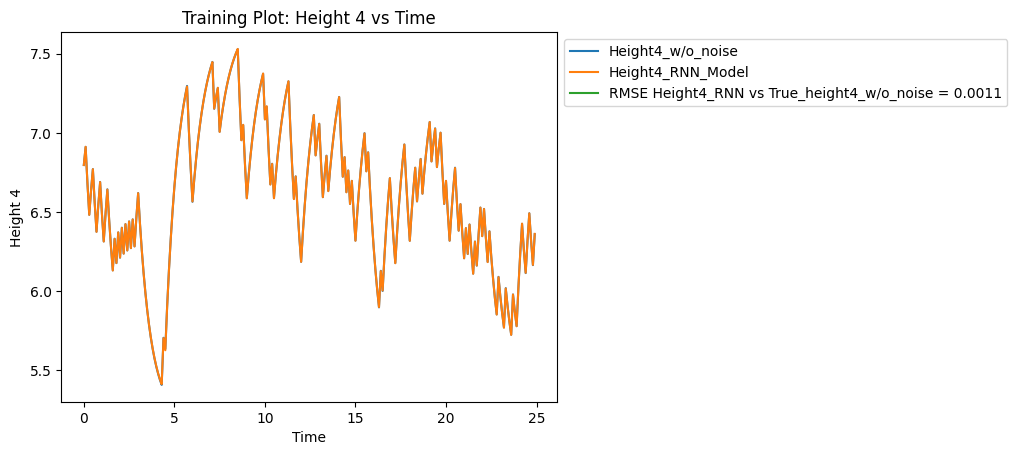

In [19]:
x = 0.1*np.arange(0,len(checktrain[200:450,0]))
plt.figure(1)
plt.plot(x,true[200:450,0], label='H1_w/o_noise')
plt.plot(x, p[200:450,0], label='H1_RNN_Model')
#plt.plot([], [], label='RMSE conc_model vs conc_w/o_noise = 0.198')
plt.plot([], [], label='RMSE Height1_RNN vs True_height1_w/o_noise = {0:.4f}'.format(RMSE_height1))
#plt.plot([], [], label='RMSE conc_model vs True_conc_w/o_noise = 0.13065')
plt.xlabel('Time')
plt.ylabel('Height 1')
plt.legend(bbox_to_anchor=(1, 1),loc='upper left')
plt.title('Training Plot: Height1 vs Time')

plt.figure(2)
plt.plot(x,true[200:450,1], label='Height2_w/o_noise')
plt.plot(x, p[200:450,1], label='Height2_RNN_Model')
#plt.plot([], [], label='RMSE Temp_model vs Temp_w/o_noise = 0.136')
#plt.plot([], [], label='RMSE Temp_model vs True_Temp = 0.1617')
plt.plot([], [], label='RMSE Height2_RNN vs True_height2_w/o_noise = {0:.4f}'.format(RMSE_height2))
plt.xlabel('Time')
plt.ylabel('Height 2')
plt.legend(bbox_to_anchor=(1, 1),loc='upper left')
plt.title('Training Plot: Height 2 vs Time')

plt.figure(3)
plt.plot(x,true[200:450,2], label='Height3_w/o_noise')
plt.plot(x, p[200:450,2], label='Height3_RNN_Model')
plt.plot([], [], label='RMSE Height3_RNN vs True_heigh31_w/o_noise = {0:.4f}'.format(RMSE_height3))
plt.xlabel('Time')
plt.ylabel('Height 3')
plt.legend(bbox_to_anchor=(1, 1),loc='upper left')
plt.title('Training Plot: Height 3 vs Time')

plt.figure(4)
plt.plot(x,true[200:450,3], label='Height4_w/o_noise')
plt.plot(x, p[200:450,3], label='Height4_RNN_Model')
#plt.plot([], [], label='RMSE Temp_model vs Temp_w/o_noise = 0.136')
#plt.plot([], [], label='RMSE Temp_model vs True_Temp = 0.1617')
plt.plot([], [], label='RMSE Height4_RNN vs True_height4_w/o_noise = {0:.4f}'.format(RMSE_height4))
plt.xlabel('Time')
plt.ylabel('Height 4')
plt.legend(bbox_to_anchor=(1, 1),loc='upper left')
plt.title('Training Plot: Height 4 vs Time')

# Validation plots

In [22]:
validating_target = y_test.detach().cpu().numpy()



validating_predictions = []
i=0

while len(validating_predictions)<len(validating_target):

    input_ = x_test[i].view(1,T,6)    # convert the x_test[i] which is 2d to 3d
    p = model(input_)

    j= np.array(p[0].detach().cpu())

    validating_predictions.append(j)

    i+=1

validating_predictions = np.array(validating_predictions).reshape(-1,4)



# validating_predictions = np.asarray(validating_predictions)
print(validating_predictions.shape)
print(validating_target.shape)


error_train_height1 = MSE(validating_target[:,0],validating_predictions[:,0])
error_train_height2 = MSE(validating_target[:,1],validating_predictions[:,1])
error_train_height3 = MSE(validating_target[:,2],validating_predictions[:,2])
error_train_height4 = MSE(validating_target[:,3],validating_predictions[:,3])


RMSE_height1 = np.sqrt(error_train_height1)
RMSE_height2 = np.sqrt(error_train_height2)
RMSE_height3 = np.sqrt(error_train_height3)
RMSE_height4 = np.sqrt(error_train_height4)

print(RMSE_height1)
print(RMSE_height2)
print(RMSE_height3)
print(RMSE_height4)


(1657, 4)
(1657, 4)
0.0050528934
0.004501085
0.0025100573
0.002628115


Text(0.5, 1.0, 'Validation Plot: Height4 vs Time')

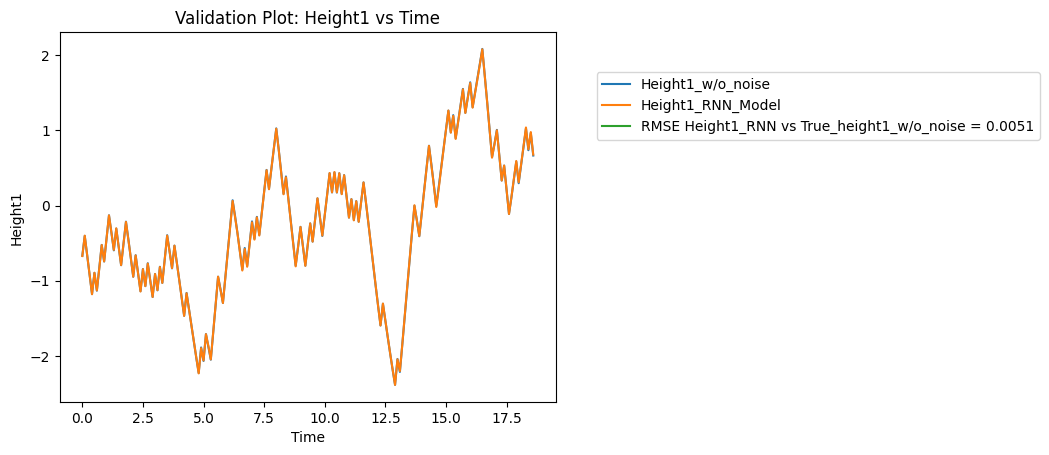

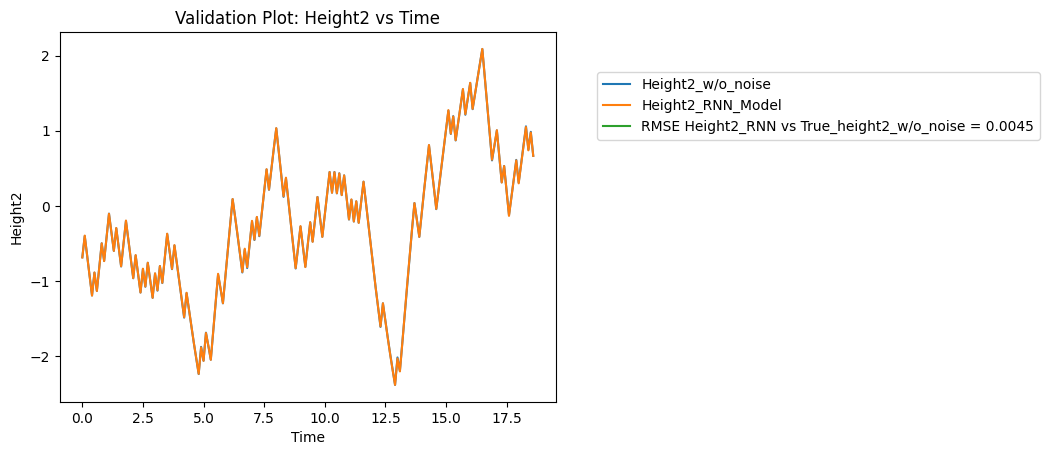

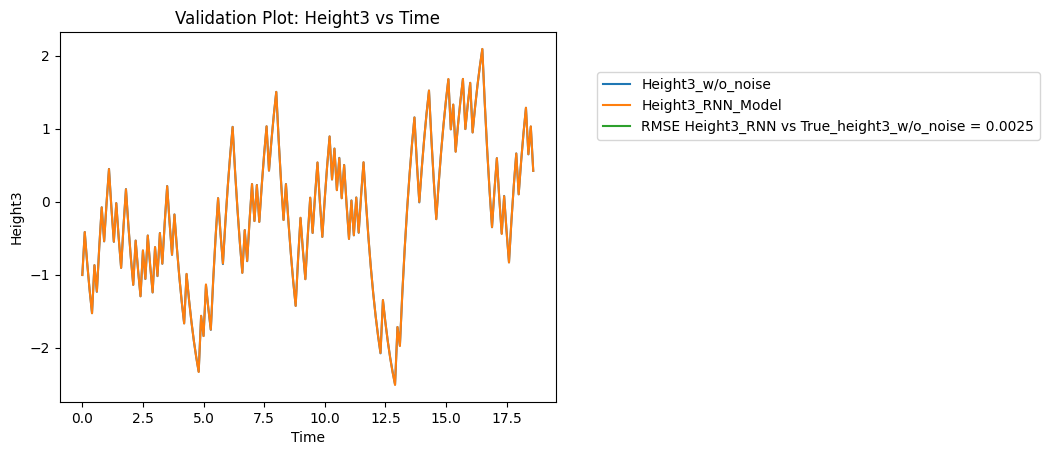

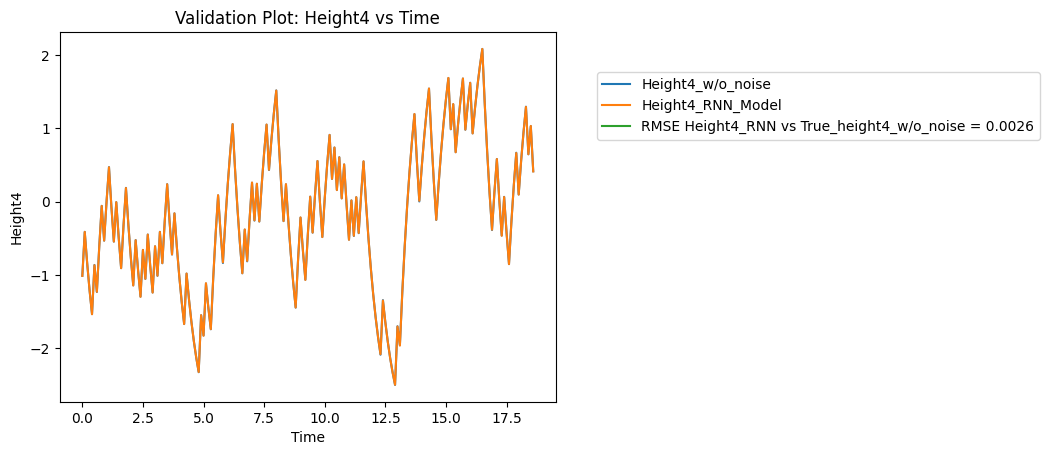

In [23]:
x = 0.1*np.arange(0,len(validating_target[:187,0]))




plt.figure(1)
plt.plot(x,validating_target[:187,0], label='Height1_w/o_noise')
plt.plot(x,validating_predictions[:187,0], label='Height1_RNN_Model')
#plt.plot([],[], label='RMSE conc_model vs conc_w/o_noise = 0.189')
plt.plot([],[], label='RMSE Height1_RNN vs True_height1_w/o_noise = {0:.4f}'.format(RMSE_height1))
plt.xlabel('Time')
plt.ylabel('Height1')
plt.legend(bbox_to_anchor=(1.99, 0.69),loc = 'lower right')
plt.title('Validation Plot: Height1 vs Time')

plt.figure(2)
plt.plot(x,validating_target[:187,1], label='Height2_w/o_noise')
plt.plot(x,validating_predictions[:187,1], label='Height2_RNN_Model')
#plt.plot([],[], label='RMSE Temp_model vs Temp_w/o_noise = 0.1310')
plt.plot([],[], label='RMSE Height2_RNN vs True_height2_w/o_noise = {0:.4f}'.format(RMSE_height2))
plt.xlabel('Time')
plt.ylabel('Height2')
plt.legend(bbox_to_anchor=(1.99, 0.69),loc = 'lower right')
plt.title('Validation Plot: Height2 vs Time')

plt.figure(3)
plt.plot(x,validating_target[:187,2], label='Height3_w/o_noise')
plt.plot(x,validating_predictions[:187,2], label='Height3_RNN_Model')
#plt.plot([],[], label='RMSE Temp_model vs Temp_w/o_noise = 0.1310')
plt.plot([],[], label='RMSE Height3_RNN vs True_height3_w/o_noise = {0:.4f}'.format(RMSE_height3))
plt.xlabel('Time')
plt.ylabel('Height3')
plt.legend(bbox_to_anchor=(1.99, 0.69),loc = 'lower right')
plt.title('Validation Plot: Height3 vs Time')

plt.figure(4)
plt.plot(x,validating_target[:187,3], label='Height4_w/o_noise')
plt.plot(x,validating_predictions[:187,3], label='Height4_RNN_Model')
#plt.plot([],[], label='RMSE Temp_model vs Temp_w/o_noise = 0.1310')
plt.plot([],[], label='RMSE Height4_RNN vs True_height4_w/o_noise = {0:.4f}'.format(RMSE_height4))
plt.xlabel('Time')
plt.ylabel('Height4')
plt.legend(bbox_to_anchor=(1.99, 0.69),loc = 'lower right')
plt.title('Validation Plot: Height4 vs Time')

## inverse validation plots

In [24]:
validating_target = y_test.detach().cpu().numpy()


validating_target[:,0] = validating_target[:,0]*std_output1 + mean_output1
validating_target[:,1] = validating_target[:,1]*std_output2 + mean_output2
validating_target[:,2] = validating_target[:,2]*std_output3 + mean_output3
validating_target[:,3] = validating_target[:,3]*std_output4 + mean_output4



validating_predictions = []
i=0

while len(validating_predictions)<len(validating_target):

    input_ = x_test[i].view(1,T,6)    # convert the x_test[i] which is 2d to 3d
    p = model(input_)

    j= np.array(p[0].detach().cpu())

    validating_predictions.append(j)

    i+=1

validating_predictions = np.array(validating_predictions).reshape(-1,4)

validating_predictions[:,0] = validating_predictions[:,0]*std_output1 + mean_output1
validating_predictions[:,1] = validating_predictions[:,1]*std_output2 + mean_output2
validating_predictions[:,2] = validating_predictions[:,2]*std_output3 + mean_output3
validating_predictions[:,3] = validating_predictions[:,3]*std_output4 + mean_output4

# validating_predictions = np.asarray(validating_predictions)
print(validating_predictions.shape)
print(validating_target.shape)


error_train_height1 = MSE(validating_target[:,0],validating_predictions[:,0])
error_train_height2 = MSE(validating_target[:,1],validating_predictions[:,1])
error_train_height3 = MSE(validating_target[:,2],validating_predictions[:,2])
error_train_height4 = MSE(validating_target[:,3],validating_predictions[:,3])


RMSE_height1 = np.sqrt(error_train_height1)
RMSE_height2 = np.sqrt(error_train_height2)
RMSE_height3 = np.sqrt(error_train_height3)
RMSE_height4 = np.sqrt(error_train_height4)

print(RMSE_height1)
print(RMSE_height2)
print(RMSE_height3)
print(RMSE_height4)


(1657, 4)
(1657, 4)
0.004120897
0.003386271
0.0011768428
0.0009083963


Text(0.5, 1.0, 'Validation Plot: Height4 vs Time')

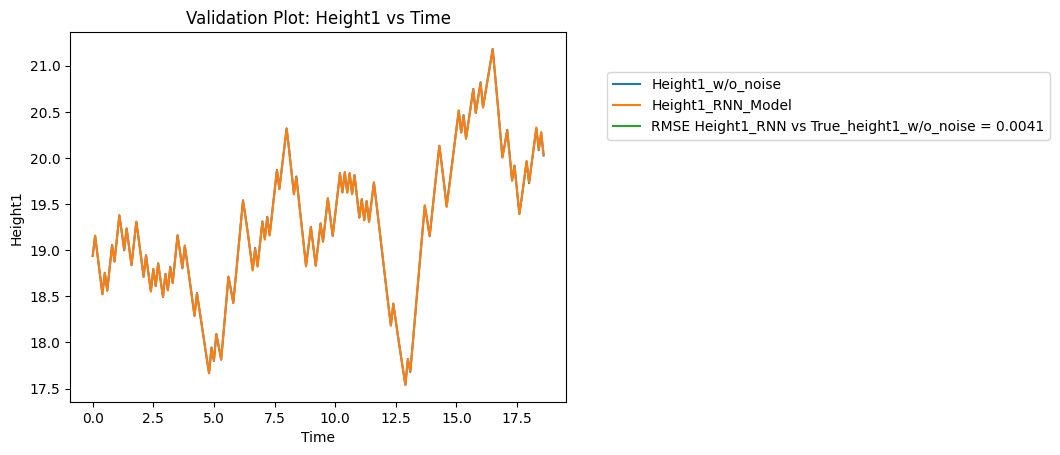

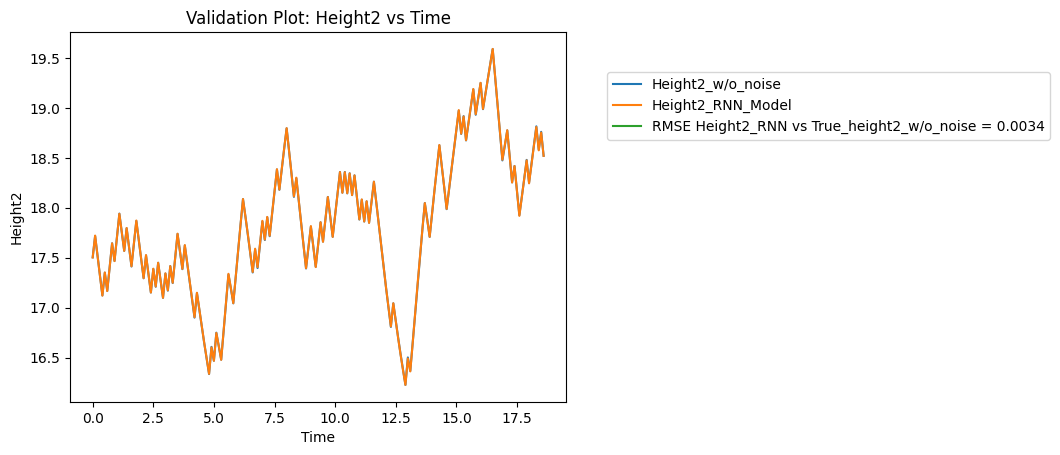

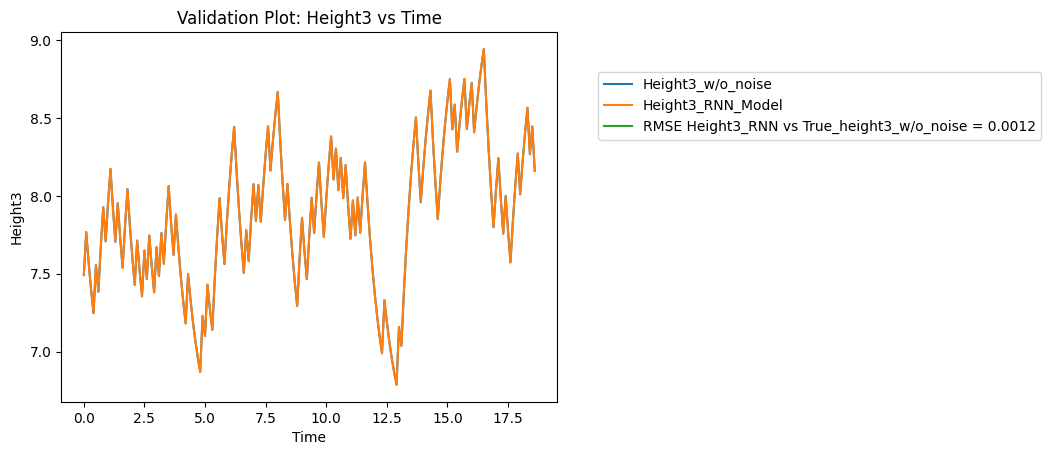

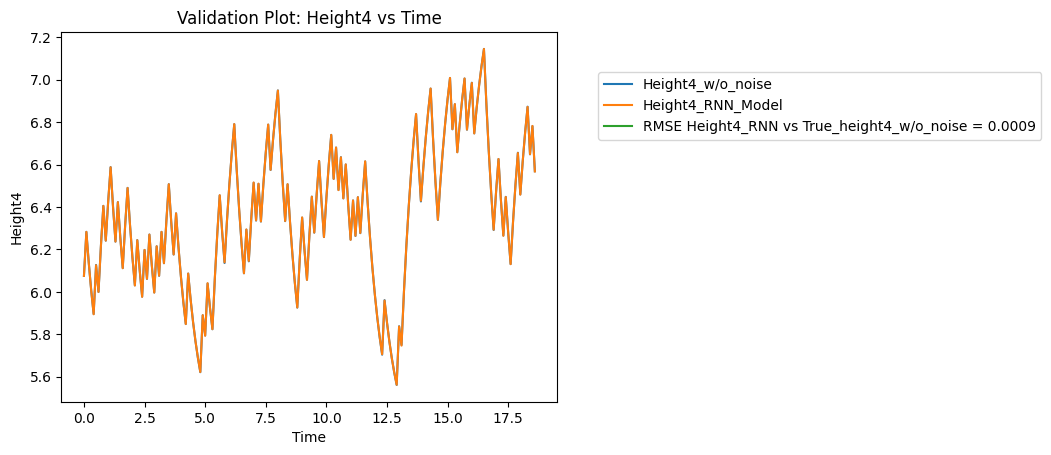

In [25]:
x = 0.1*np.arange(0,len(validating_target[:187,0]))




plt.figure(1)
plt.plot(x,validating_target[:187,0], label='Height1_w/o_noise')
plt.plot(x,validating_predictions[:187,0], label='Height1_RNN_Model')
#plt.plot([],[], label='RMSE conc_model vs conc_w/o_noise = 0.189')
plt.plot([],[], label='RMSE Height1_RNN vs True_height1_w/o_noise = {0:.4f}'.format(RMSE_height1))
plt.xlabel('Time')
plt.ylabel('Height1')
plt.legend(bbox_to_anchor=(1.99, 0.69),loc = 'lower right')
plt.title('Validation Plot: Height1 vs Time')

plt.figure(2)
plt.plot(x,validating_target[:187,1], label='Height2_w/o_noise')
plt.plot(x,validating_predictions[:187,1], label='Height2_RNN_Model')
#plt.plot([],[], label='RMSE Temp_model vs Temp_w/o_noise = 0.1310')
plt.plot([],[], label='RMSE Height2_RNN vs True_height2_w/o_noise = {0:.4f}'.format(RMSE_height2))
plt.xlabel('Time')
plt.ylabel('Height2')
plt.legend(bbox_to_anchor=(1.99, 0.69),loc = 'lower right')
plt.title('Validation Plot: Height2 vs Time')

plt.figure(3)
plt.plot(x,validating_target[:187,2], label='Height3_w/o_noise')
plt.plot(x,validating_predictions[:187,2], label='Height3_RNN_Model')
#plt.plot([],[], label='RMSE Temp_model vs Temp_w/o_noise = 0.1310')
plt.plot([],[], label='RMSE Height3_RNN vs True_height3_w/o_noise = {0:.4f}'.format(RMSE_height3))
plt.xlabel('Time')
plt.ylabel('Height3')
plt.legend(bbox_to_anchor=(1.99, 0.69),loc = 'lower right')
plt.title('Validation Plot: Height3 vs Time')

plt.figure(4)
plt.plot(x,validating_target[:187,3], label='Height4_w/o_noise')
plt.plot(x,validating_predictions[:187,3], label='Height4_RNN_Model')
#plt.plot([],[], label='RMSE Temp_model vs Temp_w/o_noise = 0.1310')
plt.plot([],[], label='RMSE Height4_RNN vs True_height4_w/o_noise = {0:.4f}'.format(RMSE_height4))
plt.xlabel('Time')
plt.ylabel('Height4')
plt.legend(bbox_to_anchor=(1.99, 0.69),loc = 'lower right')
plt.title('Validation Plot: Height4 vs Time')

# Test Plots

In [26]:
test_output = series_test_temp

inputtest, outputtest = Dataloader(series_test, test_output,T,n_input,n_output)

print(inputtest.shape,outputtest.shape)

print(type(inputtest))

inputtest = torch.from_numpy(inputtest.astype(np.float32))
print(type(inputtest))

inputtest = inputtest.to(device)


# print(outputtest)

(1656, 10, 6) (1656, 4)
<class 'numpy.ndarray'>
<class 'torch.Tensor'>


## Applying model

In [27]:
with torch.no_grad():
    testset_predictions = model(inputtest)

    testset_predictions = np.asarray(testset_predictions[0].cpu())
    
print(testset_predictions.shape)

error_train_height1 = MSE(outputtest[:,0],testset_predictions[:,0])
error_train_height2 = MSE(outputtest[:,1],testset_predictions[:,1])
error_train_height3 = MSE(outputtest[:,2],testset_predictions[:,2])
error_train_height4 = MSE(outputtest[:,3],testset_predictions[:,3])


RMSE_height1 = np.sqrt(error_train_height1)
RMSE_height2 = np.sqrt(error_train_height2)
RMSE_height3 = np.sqrt(error_train_height3)
RMSE_height4 = np.sqrt(error_train_height4)

print(RMSE_height1)
print(RMSE_height2)
print(RMSE_height3)
print(RMSE_height4)


(1656, 4)
0.006732753070033227
0.005687020257585057
0.003076092289897187
0.0035284618287743322


## Visualization

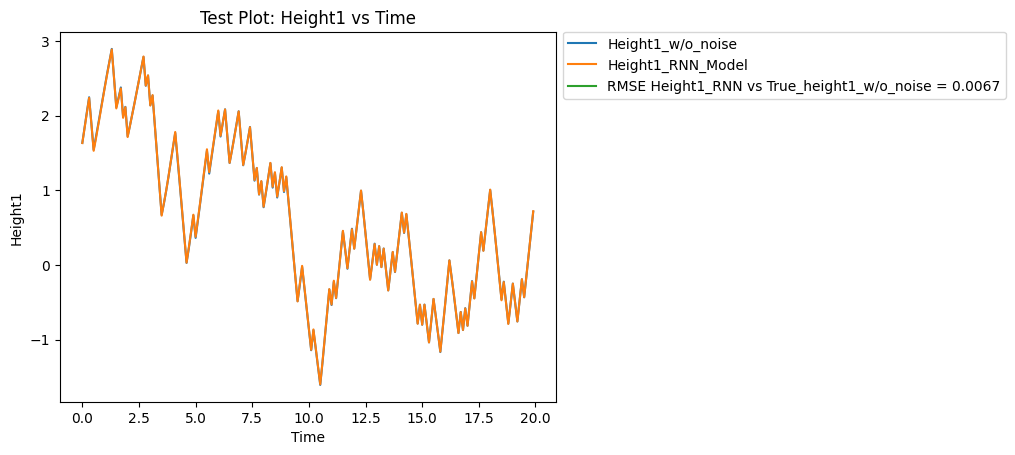

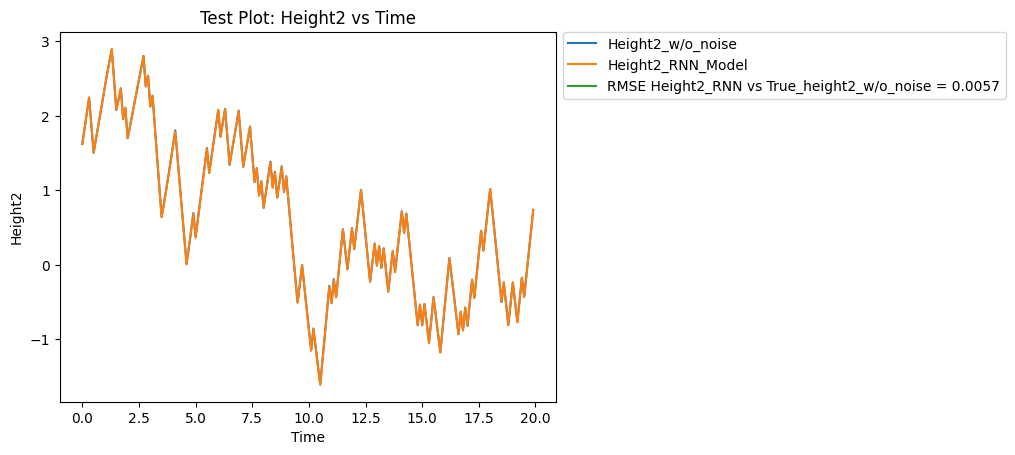

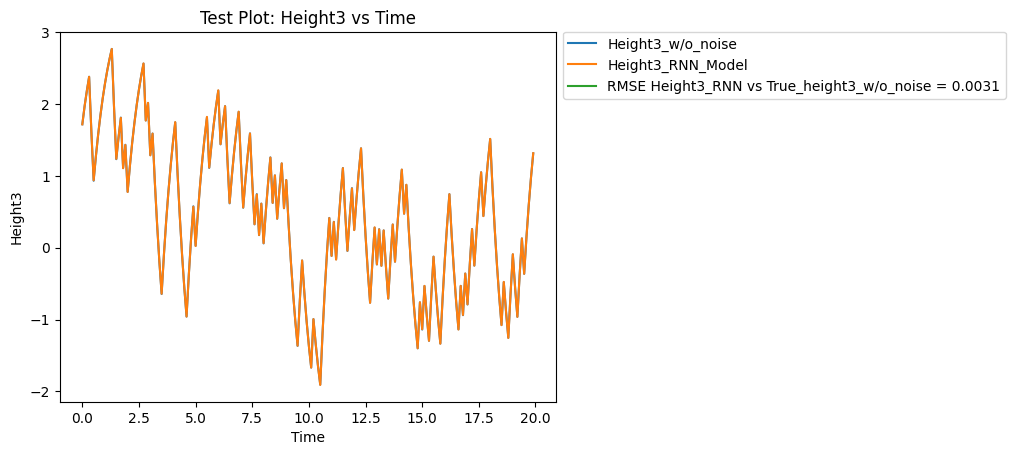

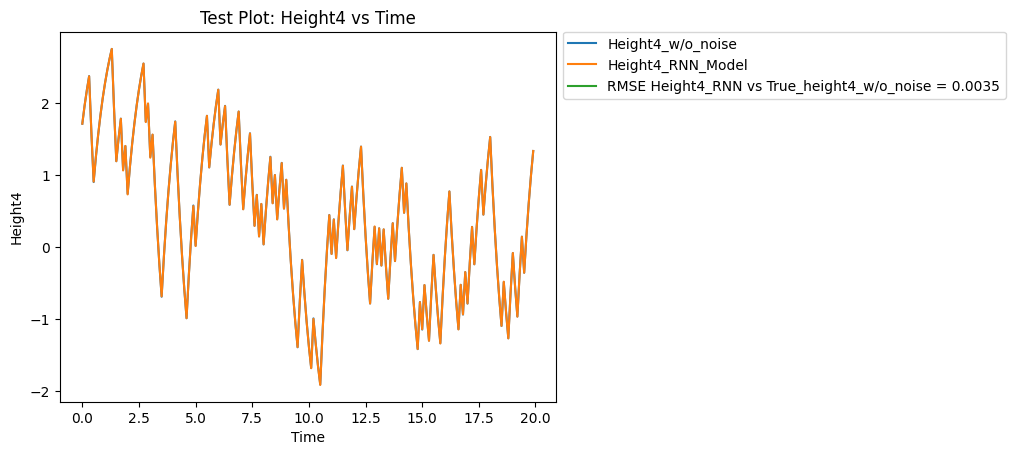

In [28]:
x = 0.1*np.arange(0,len(testset_predictions[600:800,0]))


plt.figure(1)
plt.plot(x,outputtest[600:800,0], label = 'Height1_w/o_noise')
plt.plot(x,testset_predictions[600:800,0],label='Height1_RNN_Model')
#plt.plot([],[], label='RMSE conc_model vs conc_w/o_noise = 0.1897')
plt.plot([],[], label='RMSE Height1_RNN vs True_height1_w/o_noise = {0:.4f}'.format(RMSE_height1))
plt.xlabel('Time')
plt.ylabel('Height1')
plt.title('Test Plot: Height1 vs Time')
plt.legend(bbox_to_anchor=(1, 1.02),loc='best')

plt.figure(2)
plt.plot(x,outputtest[600:800,1], label = 'Height2_w/o_noise')
plt.plot(x,testset_predictions[600:800,1],label='Height2_RNN_Model')
#plt.plot([],[], label='RMSE Temp_model vs Temp_w/o_noise = 0.1294')
plt.plot([],[], label='RMSE Height2_RNN vs True_height2_w/o_noise = {0:.4f}'.format(RMSE_height2))
plt.xlabel('Time')
plt.ylabel('Height2')
plt.title('Test Plot: Height2 vs Time')
plt.legend(bbox_to_anchor=(1, 1.02),loc='best')

plt.figure(3)
plt.plot(x,outputtest[600:800,2], label = 'Height3_w/o_noise')
plt.plot(x,testset_predictions[600:800,2],label='Height3_RNN_Model')
#plt.plot([],[], label='RMSE Temp_model vs Temp_w/o_noise = 0.1294')
plt.plot([],[], label='RMSE Height3_RNN vs True_height3_w/o_noise = {0:.4f}'.format(RMSE_height3))
plt.xlabel('Time')
plt.ylabel('Height3')
plt.title('Test Plot: Height3 vs Time')
plt.legend(bbox_to_anchor=(1, 1.02),loc='best')

plt.figure(4)
plt.plot(x,outputtest[600:800,3], label = 'Height4_w/o_noise')
plt.plot(x,testset_predictions[600:800,3],label='Height4_RNN_Model')
#plt.plot([],[], label='RMSE Temp_model vs Temp_w/o_noise = 0.1294')
plt.plot([],[], label='RMSE Height4_RNN vs True_height4_w/o_noise = {0:.4f}'.format(RMSE_height4))
plt.xlabel('Time')
plt.ylabel('Height4')
plt.title('Test Plot: Height4 vs Time')
plt.legend(bbox_to_anchor=(1, 1.02),loc='best')

##inverse plots

In [29]:
test_output = series_test_temp

inputtest, outputtest = Dataloader(series_test, test_output,T,n_input,n_output)

print(inputtest.shape,outputtest.shape)

print(type(inputtest))

inputtest = torch.from_numpy(inputtest.astype(np.float32))
print(type(inputtest))

inputtest = inputtest.to(device)


(1656, 10, 6) (1656, 4)
<class 'numpy.ndarray'>
<class 'torch.Tensor'>


In [30]:
with torch.no_grad():
    testset_predictions = model(inputtest)

    testset_predictions = np.asarray(testset_predictions[0].cpu())
    
print(testset_predictions.shape)


outputtest[:,0] = outputtest[:,0]*std_output1 + mean_output1
outputtest[:,1] = outputtest[:,1]*std_output2 + mean_output2
outputtest[:,2] = outputtest[:,2]*std_output3 + mean_output3
outputtest[:,3] = outputtest[:,3]*std_output4 + mean_output4

testset_predictions[:,0] = testset_predictions[:,0]*std_output1 + mean_output1
testset_predictions[:,1] = testset_predictions[:,1]*std_output2 + mean_output2
testset_predictions[:,2] = testset_predictions[:,2]*std_output3 + mean_output3
testset_predictions[:,3] = testset_predictions[:,3]*std_output4 + mean_output4

error_train_height1 = MSE(outputtest[:,0],testset_predictions[:,0])
error_train_height2 = MSE(outputtest[:,1],testset_predictions[:,1])
error_train_height3 = MSE(outputtest[:,2],testset_predictions[:,2])
error_train_height4 = MSE(outputtest[:,3],testset_predictions[:,3])


RMSE_height1 = np.sqrt(error_train_height1)
RMSE_height2 = np.sqrt(error_train_height2)
RMSE_height3 = np.sqrt(error_train_height3)
RMSE_height4 = np.sqrt(error_train_height4)

print(RMSE_height1)
print(RMSE_height2)
print(RMSE_height3)
print(RMSE_height4)

(1656, 4)
0.005490942851507202
0.004278474096427199
0.001442244348279559
0.001219589340877576


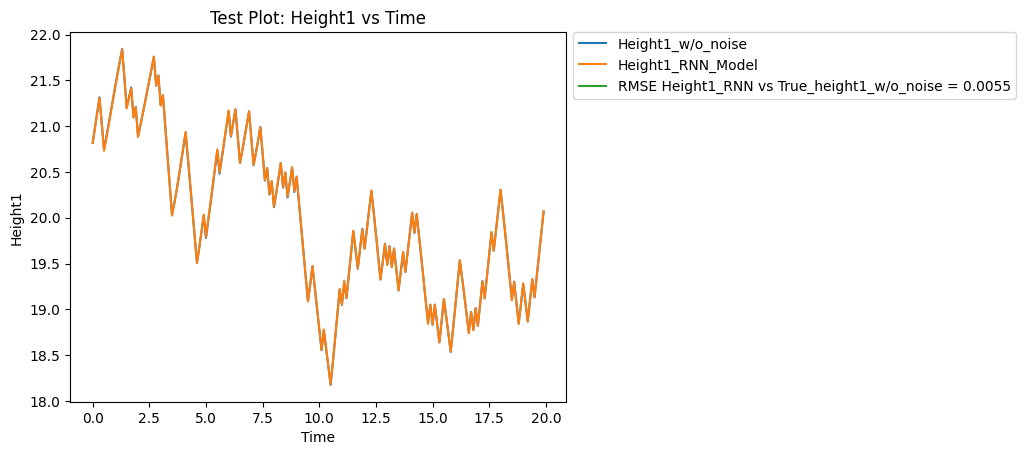

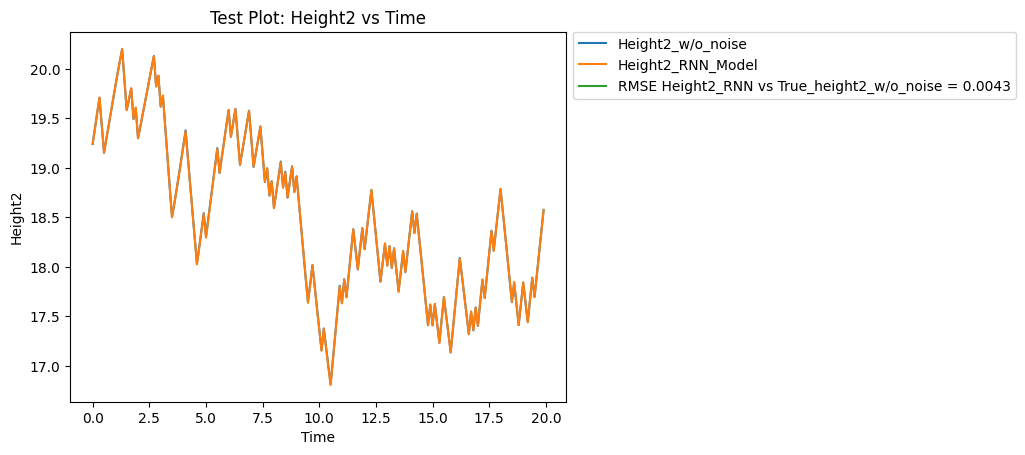

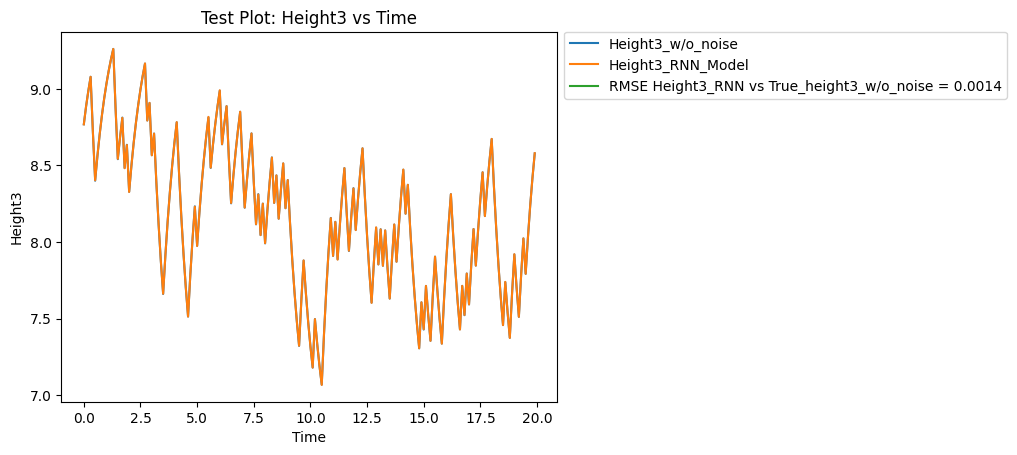

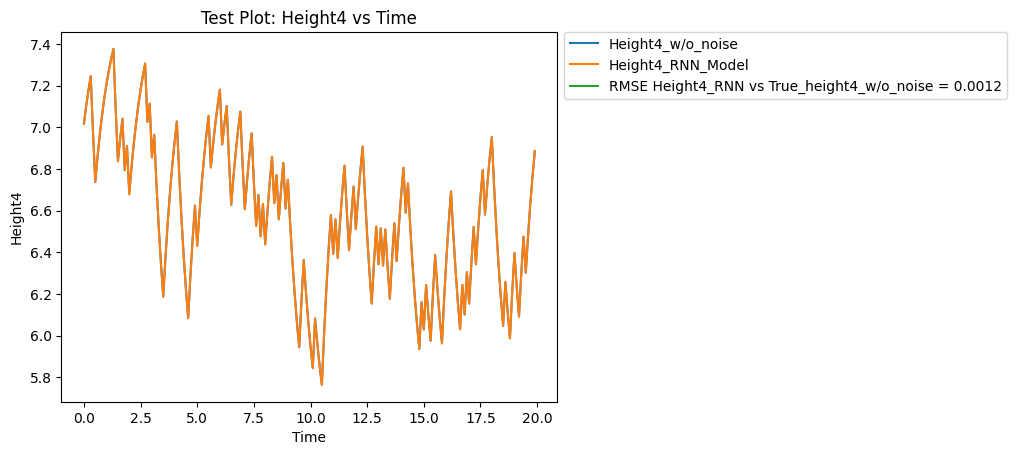

In [31]:
x = 0.1*np.arange(0,len(testset_predictions[600:800,0]))


plt.figure(1)
plt.plot(x,outputtest[600:800,0], label = 'Height1_w/o_noise')
plt.plot(x,testset_predictions[600:800,0],label='Height1_RNN_Model')
#plt.plot([],[], label='RMSE conc_model vs conc_w/o_noise = 0.1897')
plt.plot([],[], label='RMSE Height1_RNN vs True_height1_w/o_noise = {0:.4f}'.format(RMSE_height1))
plt.xlabel('Time')
plt.ylabel('Height1')
plt.title('Test Plot: Height1 vs Time')
plt.legend(bbox_to_anchor=(1, 1.02),loc='best')

plt.figure(2)
plt.plot(x,outputtest[600:800,1], label = 'Height2_w/o_noise')
plt.plot(x,testset_predictions[600:800,1],label='Height2_RNN_Model')
#plt.plot([],[], label='RMSE Temp_model vs Temp_w/o_noise = 0.1294')
plt.plot([],[], label='RMSE Height2_RNN vs True_height2_w/o_noise = {0:.4f}'.format(RMSE_height2))
plt.xlabel('Time')
plt.ylabel('Height2')
plt.title('Test Plot: Height2 vs Time')
plt.legend(bbox_to_anchor=(1, 1.02),loc='best')

plt.figure(3)
plt.plot(x,outputtest[600:800,2], label = 'Height3_w/o_noise')
plt.plot(x,testset_predictions[600:800,2],label='Height3_RNN_Model')
#plt.plot([],[], label='RMSE Temp_model vs Temp_w/o_noise = 0.1294')
plt.plot([],[], label='RMSE Height3_RNN vs True_height3_w/o_noise = {0:.4f}'.format(RMSE_height3))
plt.xlabel('Time')
plt.ylabel('Height3')
plt.title('Test Plot: Height3 vs Time')
plt.legend(bbox_to_anchor=(1, 1.02),loc='best')

plt.figure(4)
plt.plot(x,outputtest[600:800,3], label = 'Height4_w/o_noise')
plt.plot(x,testset_predictions[600:800,3],label='Height4_RNN_Model')
#plt.plot([],[], label='RMSE Temp_model vs Temp_w/o_noise = 0.1294')
plt.plot([],[], label='RMSE Height4_RNN vs True_height4_w/o_noise = {0:.4f}'.format(RMSE_height4))
plt.xlabel('Time')
plt.ylabel('Height4')
plt.title('Test Plot: Height4 vs Time')
plt.legend(bbox_to_anchor=(1, 1.02),loc='best')

# Multistep prediction

In [38]:



test_output = series_test_temp

inputtest, outputtest = Dataloader(series_test, test_output,T,n_input,n_output)

print(inputtest.shape,outputtest.shape)

print(type(inputtest))

inputtest = torch.from_numpy(inputtest.astype(np.float32))
print(type(inputtest))

inputtest = inputtest.to(device)

inputnew = inputtest
outputnew = outputtest


(1656, 10, 6) (1656, 4)
<class 'numpy.ndarray'>
<class 'torch.Tensor'>


In [39]:
validating_predictions = []

last_x = inputnew[0].view(T,6)
i=0
while len(validating_predictions)<(len(outputnew)-1):
    i = i+1
    input_ = last_x.reshape(1,T,6)    # done as input needs 3 dimension (needs 1 as batch dimension too !!)
    p = model(input_)
    validating_predictions.append(p[0].detach().cpu().numpy())
    
    last_x[0] = last_x[1]
    last_x[1] = last_x[2]
    last_x[2] = last_x[3]
    last_x[3] = last_x[4]
    last_x[4] = last_x[5]
    last_x[5] = last_x[6]
    last_x[6] = last_x[7]
    last_x[7] = last_x[8]
    last_x[8] = last_x[9]

    last_x[9][0] = inputnew[i][9,0]
    last_x[9][1] = inputnew[i][9,1]
    last_x[9][2] = p[0][0,0].detach().item()   # substituting height1 with predicted height1
    last_x[9][3] = p[0][0,1].detach().item() # substituting height2 with predicted height2
    last_x[9][4] = p[0][0,2].detach().item()   # substituting height3 with predicted height3
    last_x[9][5] = p[0][0,3].detach().item() # substituting height4 with predicted height4



print(type(validating_predictions))
validating_predictions = np.asarray(validating_predictions).reshape(-1,4)

############# Destandardizing ######################



error_train_height1 = MSE(outputnew[:1655,0],validating_predictions[:,0])
error_train_height2 = MSE(outputnew[:1655,1],validating_predictions[:,1])
error_train_height3 = MSE(outputnew[:1655,2],validating_predictions[:,2])
error_train_height4 = MSE(outputnew[:1655,3],validating_predictions[:,3])


RMSE_height1 = np.sqrt(error_train_height1)
RMSE_height2 = np.sqrt(error_train_height2)
RMSE_height3 = np.sqrt(error_train_height3)
RMSE_height4 = np.sqrt(error_train_height4)

print(RMSE_height1)
print(RMSE_height2)
print(RMSE_height3)
print(RMSE_height4)


<class 'list'>
0.006803854443369596
0.00806331166142236
0.004763035717512557
0.004837423348502937


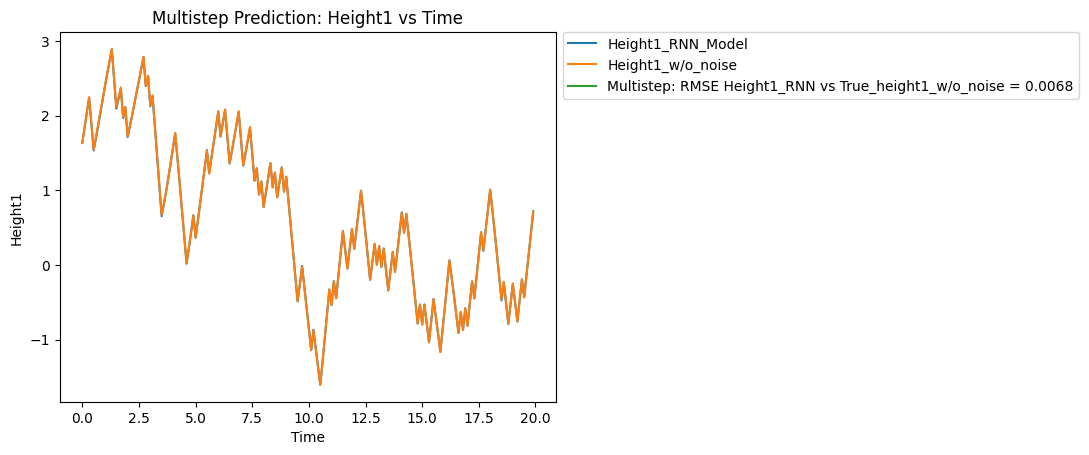

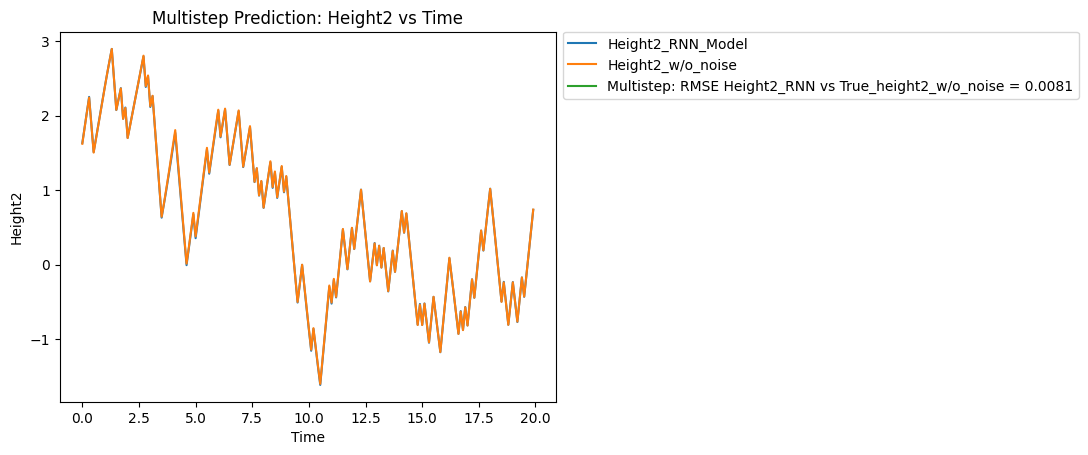

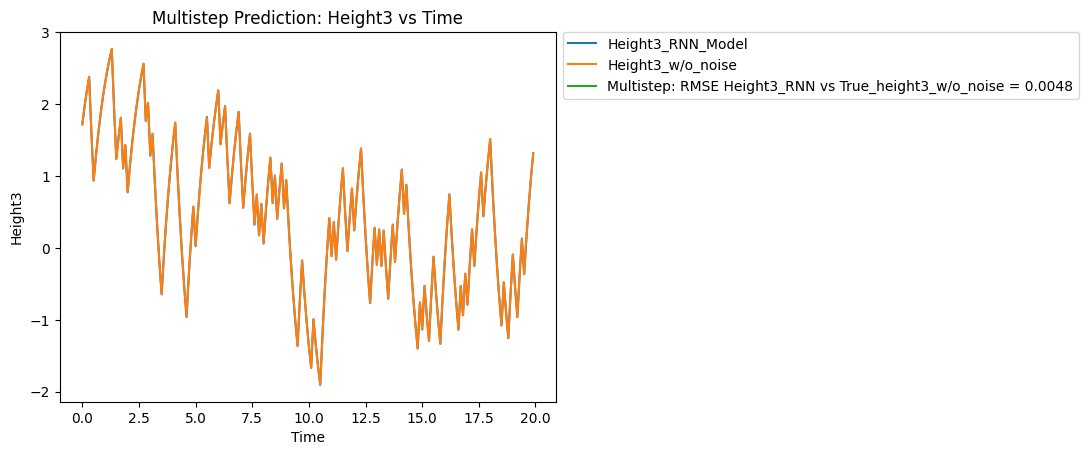

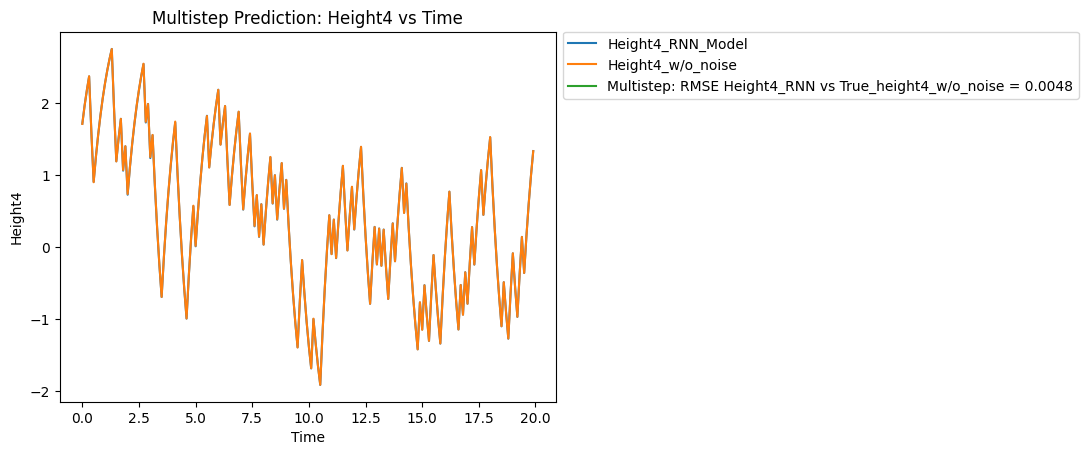

In [40]:
time = [0.1*i for i in range(200)]

time = np.array(time)






plt.figure(1)
plt.plot(time,validating_predictions[600:800,0],label='Height1_RNN_Model')
plt.plot(time,outputnew[600:800,0], label = 'Height1_w/o_noise')
plt.plot([],[], label='Multistep: RMSE Height1_RNN vs True_height1_w/o_noise = {0:.4f}'.format(RMSE_height1))
plt.xlabel('Time')
plt.ylabel('Height1')
plt.title('Multistep Prediction: Height1 vs Time')
plt.legend(bbox_to_anchor=(1, 1.02),loc='best')

plt.figure(2)
plt.plot(time,validating_predictions[600:800,1],label='Height2_RNN_Model')
plt.plot(time,outputnew[600:800,1], label = 'Height2_w/o_noise')
plt.plot([],[], label='Multistep: RMSE Height2_RNN vs True_height2_w/o_noise = {0:.4f}'.format(RMSE_height2))
plt.xlabel('Time')
plt.ylabel('Height2')
plt.title('Multistep Prediction: Height2 vs Time')
plt.legend(bbox_to_anchor=(1, 1.02),loc='best')




plt.figure(3)
plt.plot(time,validating_predictions[600:800,2],label='Height3_RNN_Model')
plt.plot(time,outputnew[600:800,2], label = 'Height3_w/o_noise')
plt.plot([],[], label='Multistep: RMSE Height3_RNN vs True_height3_w/o_noise = {0:.4f}'.format(RMSE_height3))
plt.xlabel('Time')
plt.ylabel('Height3')
plt.title('Multistep Prediction: Height3 vs Time')
plt.legend(bbox_to_anchor=(1, 1.02),loc='best')




plt.figure(4)
plt.plot(time,validating_predictions[600:800,3],label='Height4_RNN_Model')
plt.plot(time,outputnew[600:800,3], label = 'Height4_w/o_noise')
plt.plot([],[],label='Multistep: RMSE Height4_RNN vs True_height4_w/o_noise = {0:.4f}'.format(RMSE_height4))
plt.xlabel('Time')
plt.ylabel('Height4')
plt.title('Multistep Prediction: Height4 vs Time')
plt.legend(bbox_to_anchor=(1, 1.02),loc='best')


## Inverse multistep

In [41]:


test_output = series_test_temp

inputtest, outputtest = Dataloader(series_test, test_output,T,n_input,n_output)

print(inputtest.shape,outputtest.shape)

print(type(inputtest))

inputtest = torch.from_numpy(inputtest.astype(np.float32))
print(type(inputtest))

inputtest = inputtest.to(device)

inputnew = inputtest
outputnew = outputtest


(1656, 10, 6) (1656, 4)
<class 'numpy.ndarray'>
<class 'torch.Tensor'>


In [42]:
validating_predictions = []

last_x = inputnew[0].view(T,6)
i=0
while len(validating_predictions)<(len(outputnew)-1):
    i = i+1
    input_ = last_x.reshape(1,T,6)    # done as input needs 3 dimension (needs 1 as batch dimension too !!)
    p = model(input_)
    validating_predictions.append(p[0].detach().cpu().numpy())
 
 
 
 ############## Mistake ########################
    #last_x = inputnew[i].view(T,6)

#################################################

    last_x[0] = last_x[1]
    last_x[1] = last_x[2]
    last_x[2] = last_x[3]
    last_x[3] = last_x[4]
    last_x[4] = last_x[5]
    last_x[5] = last_x[6]
    last_x[6] = last_x[7]
    last_x[7] = last_x[8]
    last_x[8] = last_x[9]

    last_x[9][0] = inputnew[i][9,0]
    last_x[9][1] = inputnew[i][9,1]
    last_x[9][2] = p[0][0,0].detach().item()   # substituting height1 with predicted height1
    last_x[9][3] = p[0][0,1].detach().item() # substituting height2 with predicted height2
    last_x[9][4] = p[0][0,2].detach().item()   # substituting height3 with predicted height3
    last_x[9][5] = p[0][0,3].detach().item() # substituting height4 with predicted height4



print(type(validating_predictions))
validating_predictions = np.asarray(validating_predictions).reshape(-1,4)

############# Destandardizing ######################

outputnew[:,0] = outputnew[:,0]*std_output1 + mean_output1
outputnew[:,1] = outputnew[:,1]*std_output2 + mean_output2
outputnew[:,2] = outputnew[:,2]*std_output3 + mean_output3
outputnew[:,3] = outputnew[:,3]*std_output4 + mean_output4

validating_predictions[:,0] = validating_predictions[:,0]*std_output1 + mean_output1
validating_predictions[:,1] = validating_predictions[:,1]*std_output2 + mean_output2
validating_predictions[:,2] = validating_predictions[:,2]*std_output3 + mean_output3
validating_predictions[:,3] = validating_predictions[:,3]*std_output4 + mean_output4


error_train_height1 = MSE(outputnew[:1655,0],validating_predictions[:,0])
error_train_height2 = MSE(outputnew[:1655,1],validating_predictions[:,1])
error_train_height3 = MSE(outputnew[:1655,2],validating_predictions[:,2])
error_train_height4 = MSE(outputnew[:1655,3],validating_predictions[:,3])


RMSE_height1 = np.sqrt(error_train_height1)
RMSE_height2 = np.sqrt(error_train_height2)
RMSE_height3 = np.sqrt(error_train_height3)
RMSE_height4 = np.sqrt(error_train_height4)

print(RMSE_height1)
print(RMSE_height2)
print(RMSE_height3)
print(RMSE_height4)


<class 'list'>
0.00554887831301414
0.006066161918629644
0.0022331726624485325
0.0016720204442777836


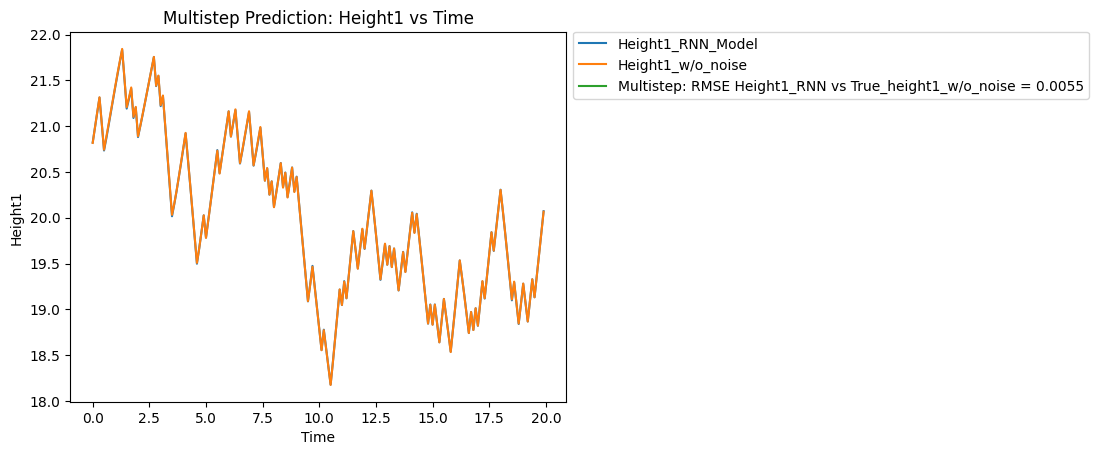

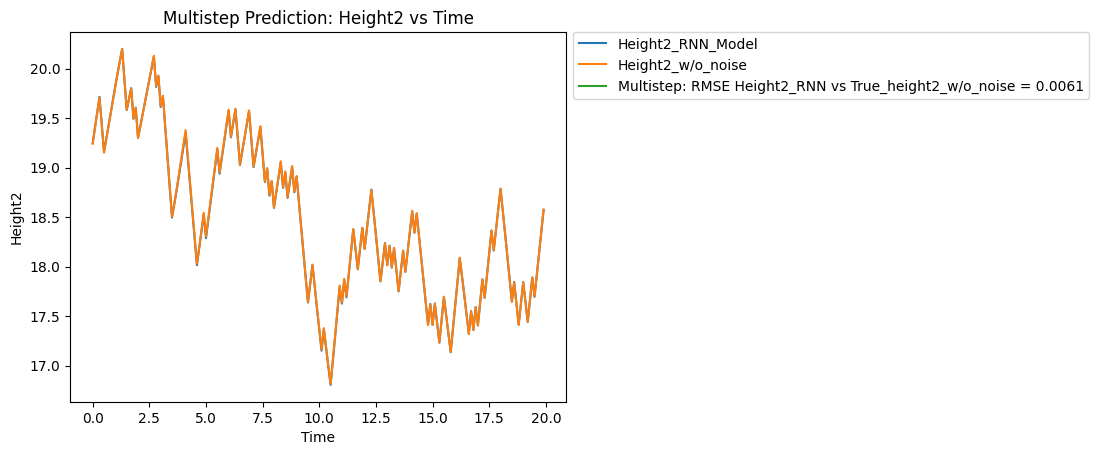

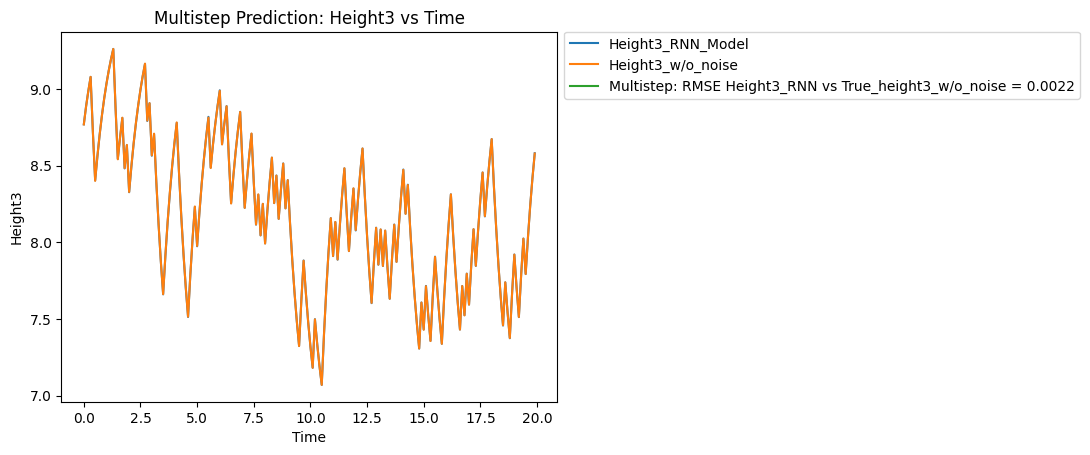

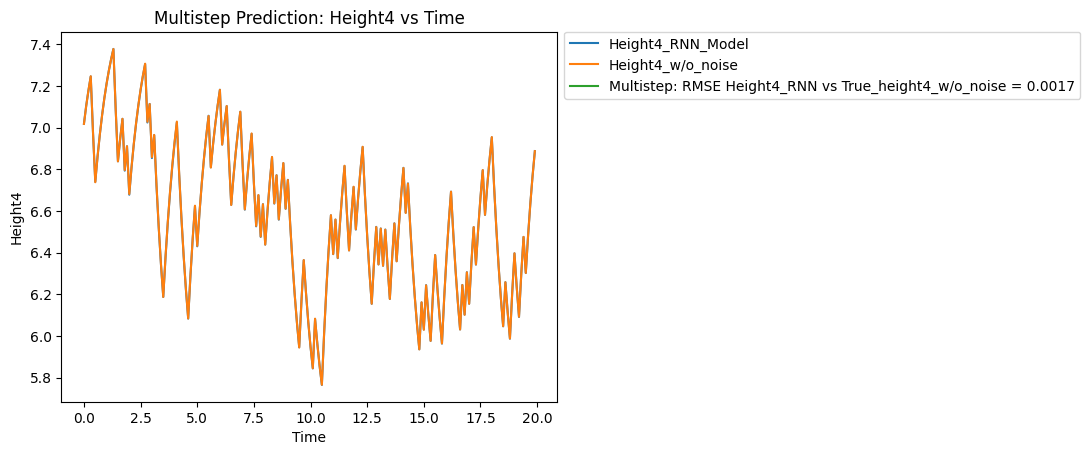

In [43]:
time = [0.1*i for i in range(200)]

time = np.array(time)






plt.figure(1)
plt.plot(time,validating_predictions[600:800,0],label='Height1_RNN_Model')
plt.plot(time,outputnew[600:800,0], label = 'Height1_w/o_noise')
plt.plot([],[], label='Multistep: RMSE Height1_RNN vs True_height1_w/o_noise = {0:.4f}'.format(RMSE_height1))
plt.xlabel('Time')
plt.ylabel('Height1')
plt.title('Multistep Prediction: Height1 vs Time')
plt.legend(bbox_to_anchor=(1, 1.02),loc='best')

plt.figure(2)
plt.plot(time,validating_predictions[600:800,1],label='Height2_RNN_Model')
plt.plot(time,outputnew[600:800,1], label = 'Height2_w/o_noise')
plt.plot([],[], label='Multistep: RMSE Height2_RNN vs True_height2_w/o_noise = {0:.4f}'.format(RMSE_height2))
plt.xlabel('Time')
plt.ylabel('Height2')
plt.title('Multistep Prediction: Height2 vs Time')
plt.legend(bbox_to_anchor=(1, 1.02),loc='best')


plt.figure(3)
plt.plot(time,validating_predictions[600:800,2],label='Height3_RNN_Model')
plt.plot(time,outputnew[600:800,2], label = 'Height3_w/o_noise')
plt.plot([],[], label='Multistep: RMSE Height3_RNN vs True_height3_w/o_noise = {0:.4f}'.format(RMSE_height3))
plt.xlabel('Time')
plt.ylabel('Height3')
plt.title('Multistep Prediction: Height3 vs Time')
plt.legend(bbox_to_anchor=(1, 1.02),loc='best')


plt.figure(4)
plt.plot(time,validating_predictions[600:800,3],label='Height4_RNN_Model')
plt.plot(time,outputnew[600:800,3], label = 'Height4_w/o_noise')
plt.plot([],[],label='Multistep: RMSE Height4_RNN vs True_height4_w/o_noise = {0:.4f}'.format(RMSE_height4))
plt.xlabel('Time')
plt.ylabel('Height4')
plt.title('Multistep Prediction: Height4 vs Time')
plt.legend(bbox_to_anchor=(1, 1.02),loc='best')


# EKF (check if want to change Q, R, C)

In [44]:


def EKF(x_est, x_pred, cov_est, yk,hidden1,hidden2,phi_test) :
    
    n_st =24
    n_op = 2
    n_ip=2

    Q = np.diagflat([0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01503,0.0176,0.0454,0.08375])

    R = np.diagflat([0.01378,0.01502])  


    C = np.zeros((2,24))
    
    C[0][20] = 0.9171
    C[1][21] = 0.8502


    C = np.array(C)
    C = np.mat(C) 

    x_pred = x_pred.reshape(n_st,1)
    yk = yk.reshape(n_op,1)


    phi_EKF = phi_test



    # one line calc gammad

    C_lin = C
    
    cov_pred = np.dot(phi_EKF,np.dot(cov_est,phi_EKF.T)) + Q
    
    kgain = np.dot(C_lin,np.dot(cov_pred,C_lin.T)) + R
    inv_kgain = kgain.I
    K_gain = np.dot(cov_pred,np.dot(C_lin.T,inv_kgain))

    y_pred = np.dot(C_lin,x_pred)
    y_pred = y_pred.reshape(n_op,1)

    x_est = x_pred + np.dot(K_gain,(yk - y_pred))
    cov_est = cov_pred - np.dot(K_gain, np.dot(C_lin,cov_pred))
              
    return x_est, y_pred, cov_est, cov_pred, phi_EKF, C_lin




# Prediction using past prediction (With EKF)

## standardize and destandardize functions (remember mean_inpu1 = manipulated 1 mean and mean_input3 = state1 mean)

In [45]:
def norm(x,mean1,mean2,mean3,mean4,std1,std2,std3,std4):
    x[0] = (x[0] - mean1)/std1
    x[1] = (x[1] - mean2)/std2
    x[2] = (x[2] - mean3)/std3
    x[3] = (x[3] - mean4)/std4

    return x


def denorm(x,mean1,mean2,mean3,mean4,std1,std2,std3,std4):
    x[0] = x[0]*std1 + mean1
    x[1] = x[1]*std2 + mean2
    x[2] = x[2]*std3 + mean3
    x[3] = x[3]*std4 + mean4

    return x

## Dataloader

In [46]:
def Dataloader(seriesss,target,plant,mech_EKF,T):
     
     data4 = []
     output = []
     d = []
     minput = []
     pmeasurement = []
     result_1stEKF = []

     for i in range(len(seriesss)-T):
         x = seriesss[i:i+T]
         data4.append(x)

         y = target[i+T-1]
         output.append(y)

        #  z = disturbance1[i+T-1]
        #  d.append(z)

        #  w = mani_input[i+T-1]
        #  minput.append(w)

         v = plant[i+T-1]
         pmeasurement.append(v)

         f = mech_EKF[i+T-1]
         result_1stEKF.append(f)

     data4 = np.asarray(data4)
     output = np.asarray(output)
    #  d = np.asarray(d)
    #  minput = np.asarray(minput)
     pmeasurement = np.asarray(pmeasurement)
     result_1stEKF = np.asarray(result_1stEKF)


     data4 = data4.reshape(-1,T,6)
     output = output.reshape(-1,4)# change when output length changes
    #  d = d.reshape(-1,1)
    #  minput = minput.reshape(-1,2)
     pmeasurement = pmeasurement.reshape(-1,2)
     result_1stEKF = result_1stEKF.reshape(-1,4)

     return data4,output,pmeasurement,result_1stEKF

## Preparing Data

In [47]:
#INPUTNEW IS ALREADY NORMALIZED AS ITS A TEST SET
#WHEREAS, OUTPUTNEW_NOISY & PLANT NEW IS NOT NORMALIZED AS THESE GENERATED LATER

inputnew,outputnew_noisy, plantnew, mech_EKF_result = Dataloader(series_test,series_test_statewithnoise,series_test_plantmeasurement,estimated_using_1stprinciple,T)


# print('Disturbance shape:',disturbancenew.shape, type(disturbancenew))
# print('Manipulated input shape:',minputnew.shape, type(minputnew))
print('Input shape:', inputnew.shape, type(inputnew))
print('Output shape:', outputnew_noisy.shape, type(outputnew_noisy))
print('plant measurement shape:', plantnew.shape, type(plantnew))
print('Phy based EKF predictions shape:', mech_EKF_result.shape, type(mech_EKF_result))
print('\n')

print(inputnew.shape,outputnew_noisy.shape)
print('\nType of input data:',type(inputnew))

inputnew = torch.from_numpy(inputnew.astype(np.float32))
print('\nType of input data:',type(inputnew))
print('\nType of output data:',type(outputnew_noisy))

inputnew = inputnew.to(device)

Input shape: (1656, 10, 6) <class 'numpy.ndarray'>
Output shape: (1656, 4) <class 'numpy.ndarray'>
plant measurement shape: (1656, 2) <class 'numpy.ndarray'>
Phy based EKF predictions shape: (1656, 4) <class 'numpy.ndarray'>


(1656, 10, 6) (1656, 4)

Type of input data: <class 'numpy.ndarray'>

Type of input data: <class 'torch.Tensor'>

Type of output data: <class 'numpy.ndarray'>


## Weights Initialization

In [48]:
## WEIGHTS AND BIAS FOR RNN
W_xh, W_hh1, b_xh, b_hh1, W_xh2, W_hh2, b_xh2, b_hh2 = model.rnn.parameters()

## WEIGHTS AND BIAS FOR OUTPUT LAYER
w, b = model.fc.parameters()

## Separating matrix of u and xy

W_manipulated_input = W_xh[:,:2]
W_states_input = W_xh[:,2:]


W_hidden2_xh1 = np.dot(W_xh2.cpu().detach().numpy(),W_hh1.cpu().detach().numpy())
W_hidden2_xy = np.dot(W_xh2.cpu().detach().numpy(),W_states_input.cpu().detach().numpy())
w_final_xh1 = np.dot(w.cpu().detach().numpy(),W_hidden2_xh1)
w_final_xh2 =  np.dot(w.cpu().detach().numpy(),W_hh2.cpu().detach().numpy())
w_final_xy = np.dot(w.cpu().detach().numpy(),W_hidden2_xy)



In [49]:
print(W_xh.shape,W_hh1.shape,W_xh2.shape,W_hh2.shape,w.shape)
print(b_xh.shape,b_hh1.shape,b_xh2.shape,b_hh2.shape,b.shape)

torch.Size([10, 6]) torch.Size([10, 10]) torch.Size([10, 10]) torch.Size([10, 10]) torch.Size([4, 10])
torch.Size([10]) torch.Size([10]) torch.Size([10]) torch.Size([10]) torch.Size([4])


## Implementing EKF and prediction together



### mean and variance of normalized subspace

In [51]:


mean_plant1 = series_plantmeasurement[:,0].mean()
mean_plant2 = series_plantmeasurement[:,1].mean()
var_plant1 = 0.675132
var_plant2 = 0.5759
std_plant1 = series_plantmeasurement[:,0].std()
std_plant2 = series_plantmeasurement[:,1].std()


In [52]:

validating_predictions = []

#    NO NEED TO INITALIZE X(0|0) WITH 18 STATES AS X(0|0) IS REQUIRED FOR RNN AND IT ONLY REQUIRES CON(0|0) AND TEMP (0|0) 
# REST FOR EKF 1 STES ARE ADDED IN EKF FUNCTION SO AFTER 1ST ITERATION XEST(1|1) IS AUTOMATICALLY 18X18
x_est = [19.4255, 17.9628,7.9311,6.4053]
x_est = np.array(x_est)

############################## Normalizing the first input (with input mean and std) ############################

x_est = norm(x_est,mean_input3,mean_input4,mean_input5,mean_input6,std_input3,std_input4,std_input5,std_input6)




x_est_app = []

cov_est = np.diagflat([0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1])

last_x = inputnew[0].view(T,6)

# By doing this we are starting with x_hat_intial values which is standard procedure used for estimator
last_x[9][2]=x_est[0]
last_x[9][3]=x_est[1]
last_x[9][4]=x_est[2]
last_x[9][5]=x_est[3]




k=0

model_pred_h1=[]
model_pred_h2=[]
model_pred_h3=[]
model_pred_h4=[]

hidden1_prev = np.zeros((10,1))

test_hidden = []

while len(validating_predictions)<(len(inputnew)-1):
#while len(validating_predictions)<10:

    yk = plantnew[k].copy()

    yk[0] = (yk[0] - mean_plant1)/std_plant1
    yk[1] = (yk[1] - mean_plant2)/std_plant2


    k = k+1

    print('%%%%%%%%% iteration going %%%%%%%%%%% ', k)
    input_ = last_x.reshape(1,T,6)    # done as input needs 3 dimension (needs 1 as batch dimension too !!)
    p = model(input_)



#################################
    hidden1= p[1][0].cpu().detach().numpy()
    hidden2 = p[1][1].cpu().detach().numpy()
##################################



###################################################### Generating Phi matrix ######################################################

# GEnerating phi matrix inside as now differentiation of state equation will require hidden value at each instant

#################################### Generating sec derivative for phi ####################################


#This is for equation of xh1(k+1)

    test_f = np.arctanh(hidden1).reshape(10,1)
    test_cos = np.cosh(test_f)
    test_sec = 1/test_cos
    test1_sec_square = test_sec**2


    hidden1_prev = hidden1

    test_f_2 = np.arctanh(hidden2).reshape(10,1)
    test_cos_2 = np.cosh(test_f_2)
    test_sec_2 = 1/test_cos_2
    test2_sec_square = test_sec_2**2

    #print(test2_sec_square)

    phi_RNN = np.zeros((24,24))
    for i in range(24):
        for j in range(24):
            if i<10:
                if j<10:
                    phi_RNN[i,j]= test1_sec_square[i] * W_hh1[i,j].cpu().detach().numpy()
                elif 9<j<20:
                    phi_RNN[i,j] = 0
                else:
                    phi_RNN[i,j] = test1_sec_square[i] * W_states_input[i,j-20].cpu().detach().numpy()

            if 9<i<20:
                if j<10:
                    phi_RNN[i,j]= test2_sec_square[i-10] * test1_sec_square[i-10] * W_hidden2_xh1[i-10,j] 
                elif 9<j<20:
                    phi_RNN[i,j] = test2_sec_square[i-10] * W_hh2[i-10,j-10].cpu().detach().numpy()
                else:
                    phi_RNN[i,j] = test2_sec_square[i-10] * test1_sec_square[i-10] * W_hidden2_xy[i-10,j-20]

            if 19<i<24:
                if j<10:
                    phi_RNN[i,j]= test2_sec_square[i-20] * test1_sec_square[i-20] * w_final_xh1[i-20,j] 
                elif 9<j<20:
                    phi_RNN[i,j] = test2_sec_square[i-20] * w_final_xh2[i-20,j-10]
                else:
                    phi_RNN[i,j] = test2_sec_square[i-20] * test1_sec_square[i-20] * w_final_xy[i-20,j-20]   




    phi_test = phi_RNN





    test2=[]
    for item in hidden1[0]:
        test2.append(item)

    for item in hidden2[0]:
        test2.append(item)

    for item in p[0][0]:
        
        test2.append(item.cpu().detach().numpy())



    model_pred_h1.append(p[0][0,0])
    model_pred_h2.append(p[0][0,1])
    model_pred_h3.append(p[0][0,2])
    model_pred_h4.append(p[0][0,3])


    
    p_convert= np.array(test2)

    x_est, y_pred, cov_est, cov_pred, phi_EKF, C_lin  = EKF(x_est,p_convert,cov_est,yk,hidden1,hidden2,phi_test)  
 


    x_est = np.array(x_est)

    #x_est_app.append(x_est.reshape(-1,2))
    x_est_app.append(x_est.reshape(-1,24))

    cov_est = np.array(cov_est)

    dummy = torch.from_numpy(x_est.T.astype(np.float32))



    validating_predictions.append(p_convert)
    #last_x = inputnew[k].view(T,6)
    

    last_x[0] = last_x[1]
    last_x[1] = last_x[2]
    last_x[2] = last_x[3]
    last_x[3] = last_x[4]
    last_x[4] = last_x[5]
    last_x[5] = last_x[6]
    last_x[6] = last_x[7]
    last_x[7] = last_x[8]
    last_x[8] = last_x[9]

    last_x[9][0] = inputnew[k][9,0]
    last_x[9][1] = inputnew[k][9,1]

    last_x[9][2] = dummy[0,20]      # substituting Height1 with predicted Height1
    last_x[9][3] = dummy[0,21] # substituting Height2 with predicted Height2
    last_x[9][4] = dummy[0,22]      # substituting height3 with predicted Height3
    last_x[9][5] = dummy[0,23] # substituting Height4 with predicted Height4
    


%%%%%%%%% iteration going %%%%%%%%%%%  1
%%%%%%%%% iteration going %%%%%%%%%%%  2
%%%%%%%%% iteration going %%%%%%%%%%%  3
%%%%%%%%% iteration going %%%%%%%%%%%  4
%%%%%%%%% iteration going %%%%%%%%%%%  5
%%%%%%%%% iteration going %%%%%%%%%%%  6
%%%%%%%%% iteration going %%%%%%%%%%%  7
%%%%%%%%% iteration going %%%%%%%%%%%  8
%%%%%%%%% iteration going %%%%%%%%%%%  9
%%%%%%%%% iteration going %%%%%%%%%%%  10
%%%%%%%%% iteration going %%%%%%%%%%%  11
%%%%%%%%% iteration going %%%%%%%%%%%  12
%%%%%%%%% iteration going %%%%%%%%%%%  13
%%%%%%%%% iteration going %%%%%%%%%%%  14
%%%%%%%%% iteration going %%%%%%%%%%%  15
%%%%%%%%% iteration going %%%%%%%%%%%  16
%%%%%%%%% iteration going %%%%%%%%%%%  17
%%%%%%%%% iteration going %%%%%%%%%%%  18
%%%%%%%%% iteration going %%%%%%%%%%%  19
%%%%%%%%% iteration going %%%%%%%%%%%  20
%%%%%%%%% iteration going %%%%%%%%%%%  21
%%%%%%%%% iteration going %%%%%%%%%%%  22
%%%%%%%%% iteration going %%%%%%%%%%%  23
%%%%%%%%% iteration going %%%%%%%%%%%  24
%

In [53]:
testing= np.array(x_est_app)
testing = testing.reshape(-1,24)
print(testing.shape)

test_denorm=[]
for item in testing:
     test_denorm.append(denorm(item[20:], mean_EKF_output1, mean_EKF_output2, mean_EKF_output3, mean_EKF_output4, std_EKF_output1, std_EKF_output2, std_EKF_output3, std_EKF_output4))


(1655, 24)


In [54]:

x_est_app2 = np.array(test_denorm)
print(x_est_app2.shape)
model_pred_h1_array = np.array(model_pred_h1)
model_pred_h2_array = np.array(model_pred_h2)
model_pred_h3_array = np.array(model_pred_h3)
model_pred_h4_array = np.array(model_pred_h4)


##################### DEnormalising model prediction ###################
model_pred_h1_array = model_pred_h1_array*std_output1 + mean_output1
model_pred_h2_array = model_pred_h2_array*std_output2 + mean_output2
model_pred_h3_array = model_pred_h3_array*std_output3 + mean_output3
model_pred_h4_array = model_pred_h4_array*std_output4 + mean_output4

#########################################################################

validating_predictions2 = np.array(validating_predictions)
print('Shape of EKF prediction:',x_est_app2.shape)
print('Shape of model prediction:',validating_predictions2.shape)


x_est_app2 = x_est_app2.reshape(-1,4)
validating_predictions2 = validating_predictions2.reshape(-1,24)
print('Shape of EKF prediction reshape:',x_est_app2.shape)
print('Shape of model prediction reshape:',validating_predictions2.shape)
print('Shape of model prediction reshape:',model_pred_h1_array.shape)

(1655, 4)
Shape of EKF prediction: (1655, 4)
Shape of model prediction: (1655, 24)
Shape of EKF prediction reshape: (1655, 4)
Shape of model prediction reshape: (1655, 24)
Shape of model prediction reshape: (1655,)


##Visualization

## RMSE

In [55]:
time = np.arange(0,len(x_est_app2[610:625,0]))

error_Height1_EKF = MSE(outputnew_noisy[:1655,0],x_est_app2[:1655,0])
error_Height2_EKF = MSE(outputnew_noisy[:1655,1],x_est_app2[:1655,1])
error_Height3_EKF = MSE(outputnew_noisy[:1655,2],x_est_app2[:1655,2])
error_Height4_EKF = MSE(outputnew_noisy[:1655,3],x_est_app2[:1655,3])


RMSE_height1 = np.sqrt(error_Height1_EKF)
RMSE_height2 = np.sqrt(error_Height2_EKF)
RMSE_height3 = np.sqrt(error_Height3_EKF)
RMSE_height4 = np.sqrt(error_Height4_EKF)



error_Height1_PhyEKF = MSE(outputnew_noisy[:1655,0],mech_EKF_result[:1655,0])
error_Height2_PhyEKF = MSE(outputnew_noisy[:1655,1],mech_EKF_result[:1655,1])
error_Height3_PhyEKF = MSE(outputnew_noisy[:1655,2],mech_EKF_result[:1655,2])
error_Height4_PhyEKF = MSE(outputnew_noisy[:1655,3],mech_EKF_result[:1655,3])

RMSE_phyEKF_height1 = np.sqrt(error_Height1_PhyEKF)
RMSE_phyEKF_height2 = np.sqrt(error_Height2_PhyEKF)
RMSE_phyEKF_height3 = np.sqrt(error_Height3_PhyEKF)
RMSE_phyEKF_height4 = np.sqrt(error_Height4_PhyEKF)




error_Height1_model = MSE(outputnew_noisy[:1655,0],model_pred_h1_array[:1655])

error_Height2_model = MSE(outputnew_noisy[:1655,1],model_pred_h2_array[:1655])
error_Height3_model = MSE(outputnew_noisy[:1655,2],model_pred_h3_array[:1655])
error_Height4_model = MSE(outputnew_noisy[:1655,3],model_pred_h4_array[:1655])

RMSE_height1_model = np.sqrt(error_Height1_model)
RMSE_height2_model = np.sqrt(error_Height2_model)
RMSE_height3_model = np.sqrt(error_Height3_model)
RMSE_height4_model = np.sqrt(error_Height4_model)



print('\RNN EKF vs True states')
print('error_Height1_EKF',np.sqrt(error_Height1_EKF))
print('error_Height2_EKF',np.sqrt(error_Height2_EKF))
print('error_Height3_EKF',np.sqrt(error_Height3_EKF))
print('error_Height4_EKF',np.sqrt(error_Height4_EKF))


print('\nPhysics EKF vs True states')
print('error_Height1_PhyEKF',np.sqrt(error_Height1_PhyEKF))
print('error_Height2_PhyEKF',np.sqrt(error_Height2_PhyEKF))
print('error_Height3_PhyEKF',np.sqrt(error_Height3_PhyEKF))
print('error_Height4_PhyEKF',np.sqrt(error_Height4_PhyEKF))

print('\nModel vs True states')
print('error_Height1_model',np.sqrt(error_Height1_model))
print('error_Height2_model',np.sqrt(error_Height2_model))
print('error_Height3_model',np.sqrt(error_Height3_model))
print('error_Height4_model',np.sqrt(error_Height4_model))


\RNN EKF vs True states
error_Height1_EKF 0.13340366791997957
error_Height2_EKF 0.16952456735052845
error_Height3_EKF 0.21597607028669075
error_Height4_EKF 0.20920264778286432

Physics EKF vs True states
error_Height1_PhyEKF 0.029948243370300807
error_Height2_PhyEKF 0.028940495259428912
error_Height3_PhyEKF 0.20681438565729326
error_Height4_PhyEKF 0.181288061456308

Model vs True states
error_Height1_model 0.226401536184993
error_Height2_model 0.23915484152335223
error_Height3_model 0.21084650721329112
error_Height4_model 0.19277054218742018


Text(0.5, 1.0, 'Height4 vs Time instant')

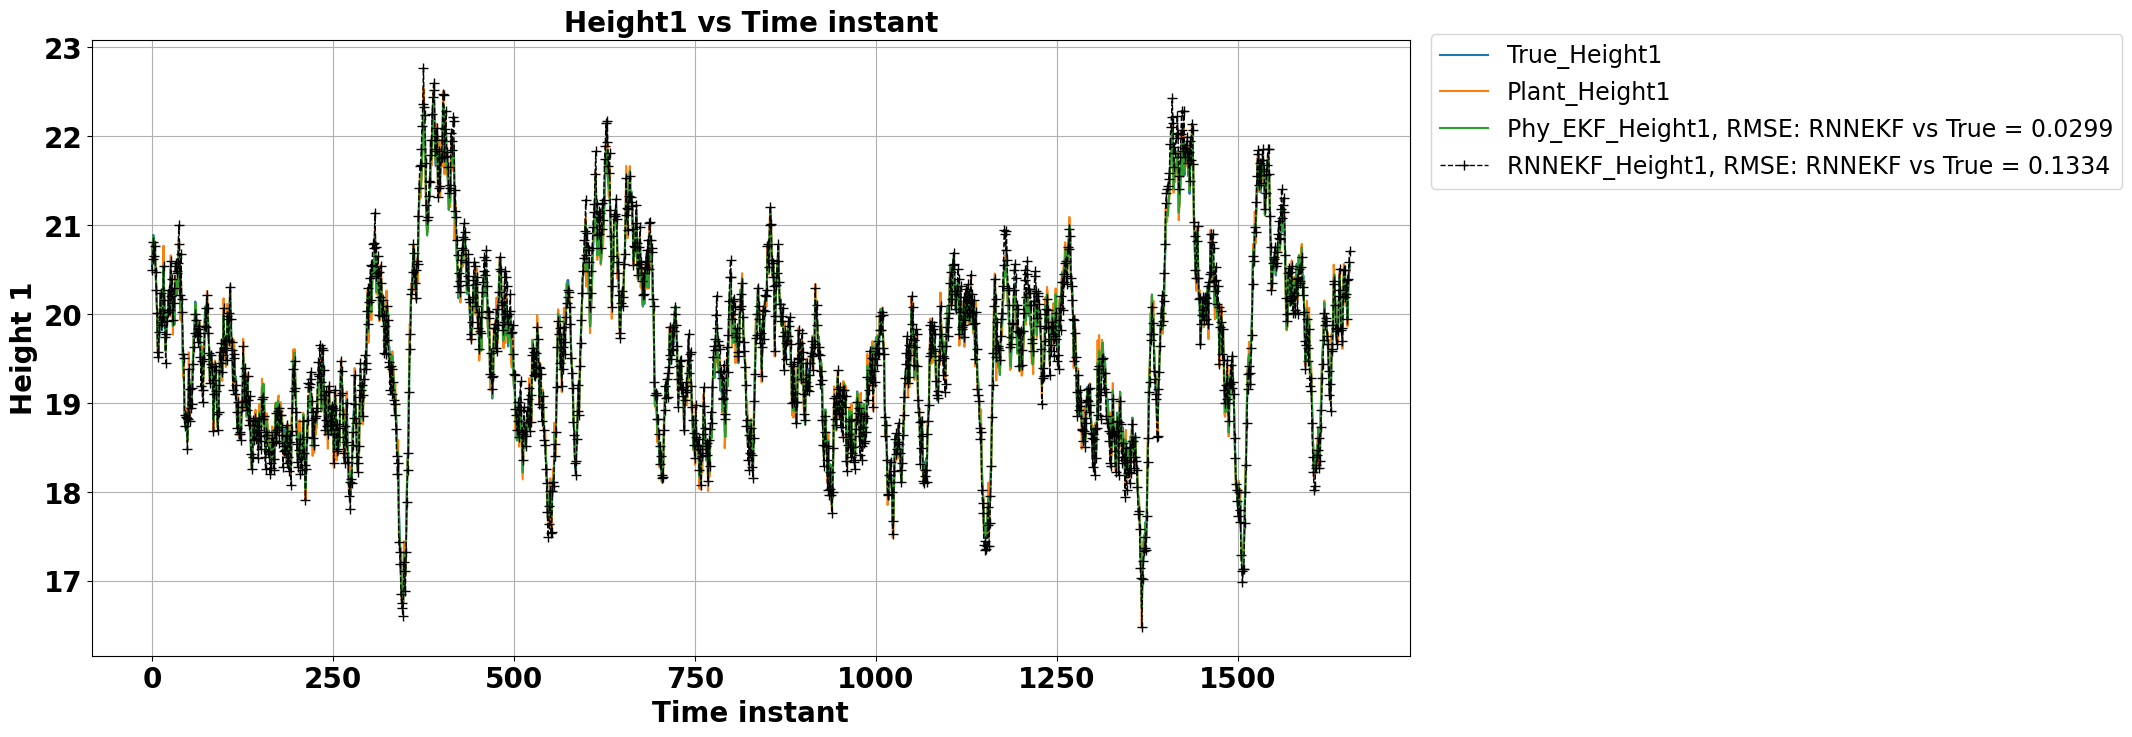

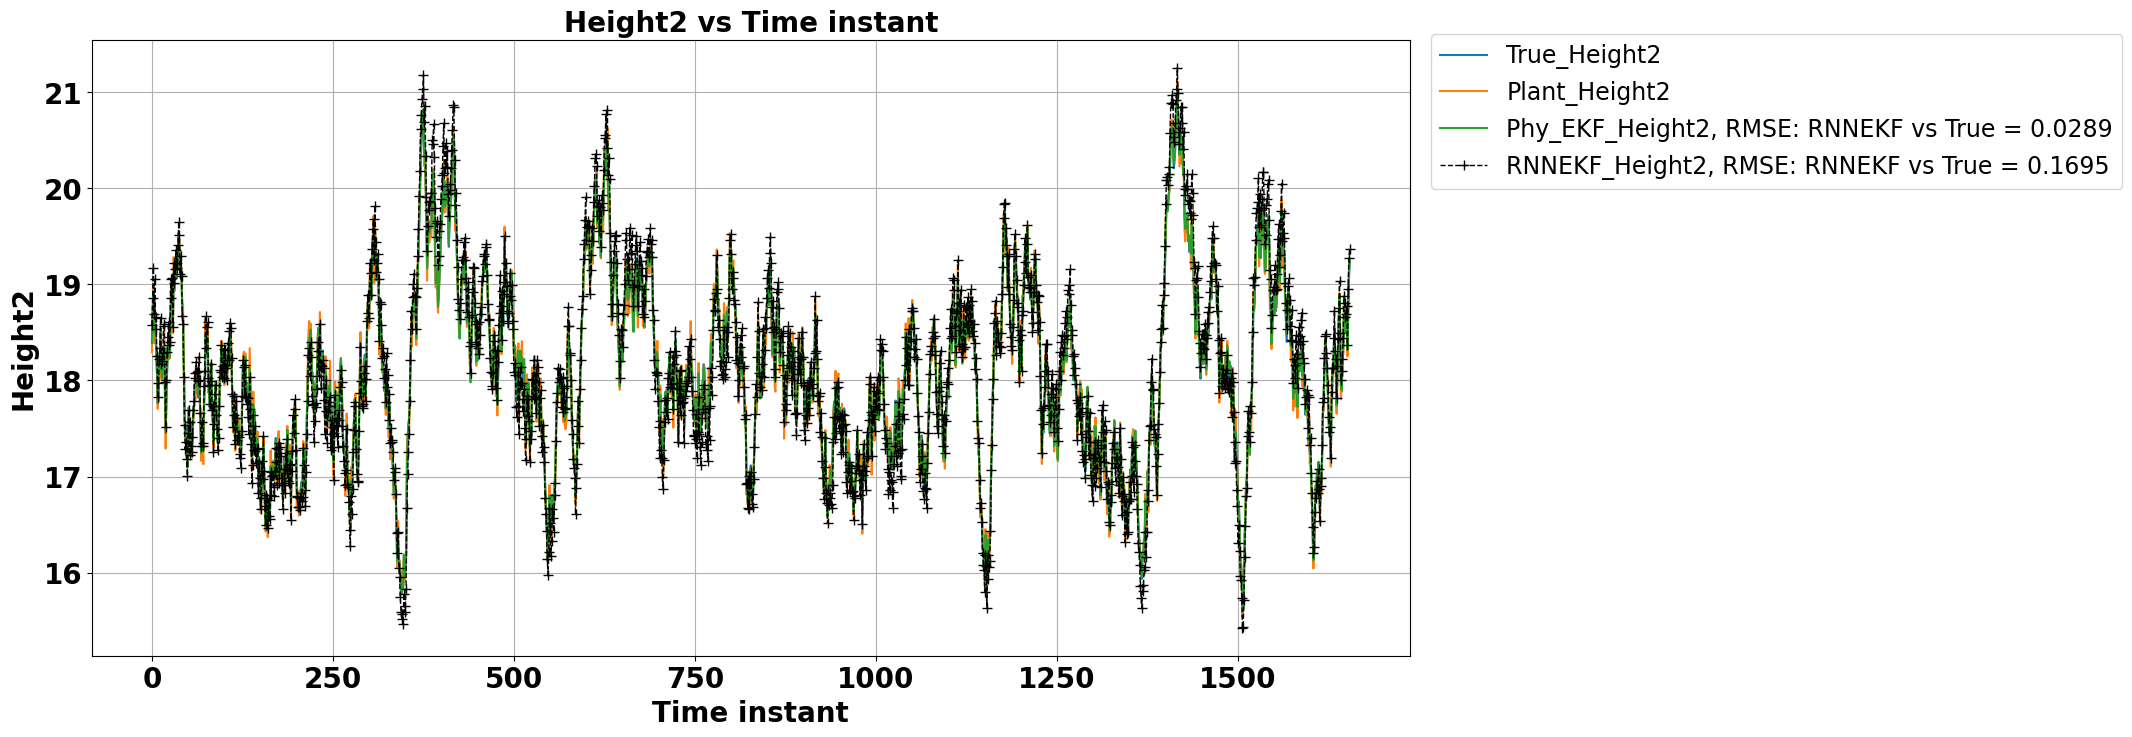

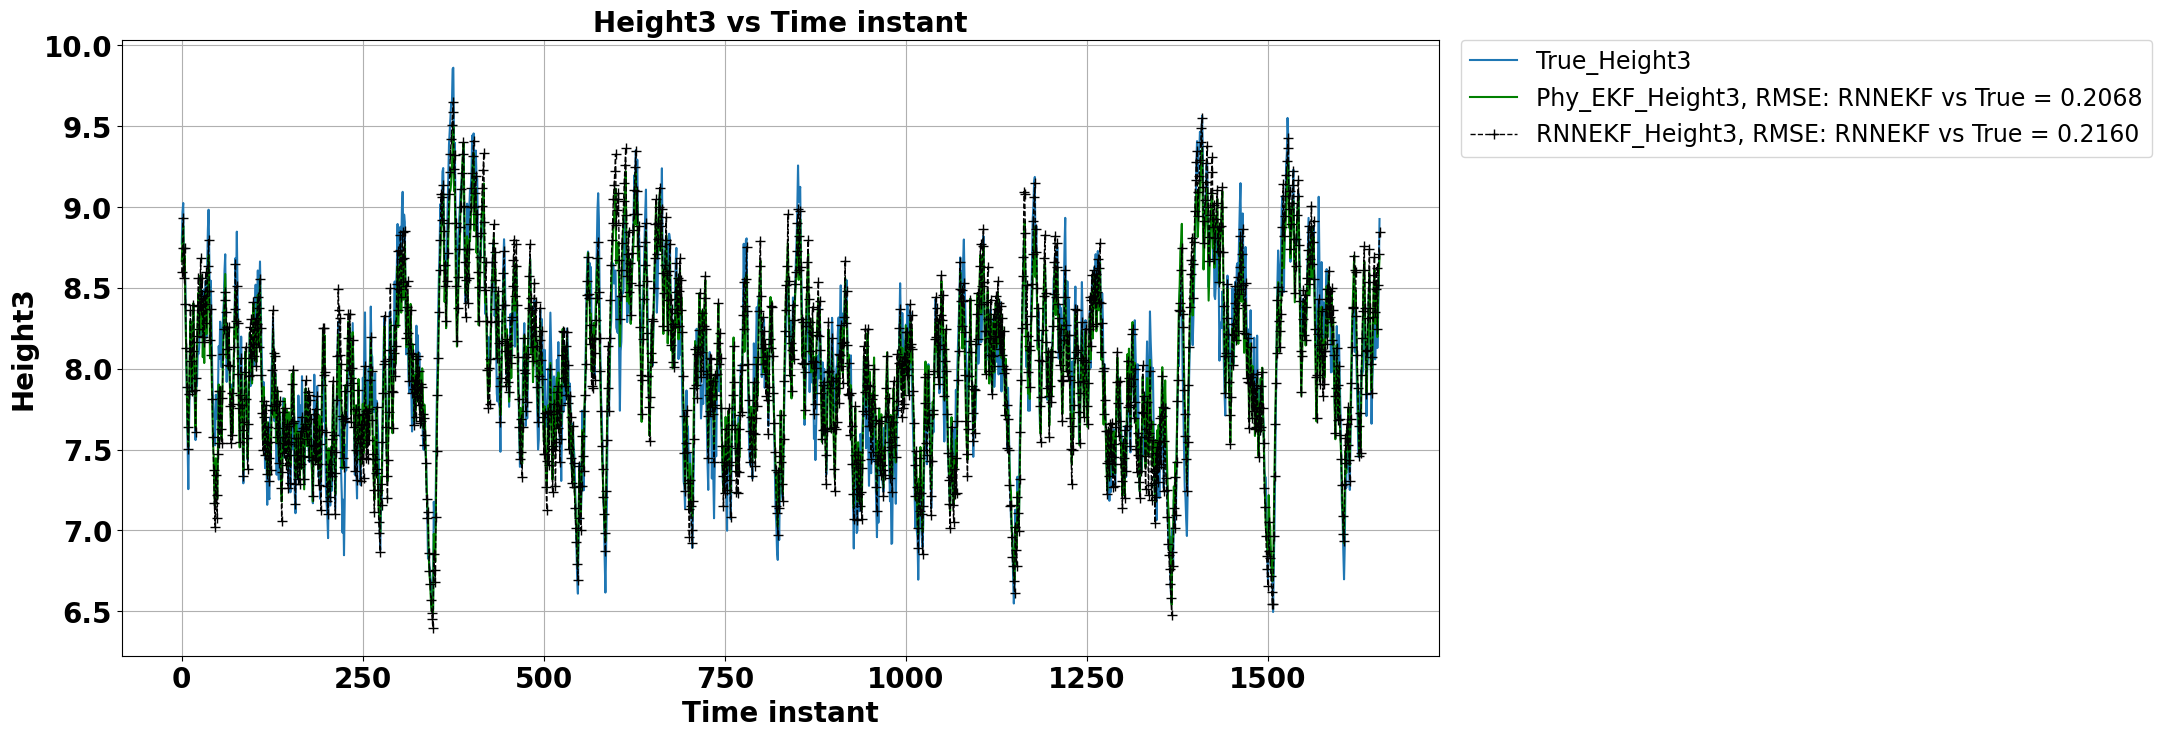

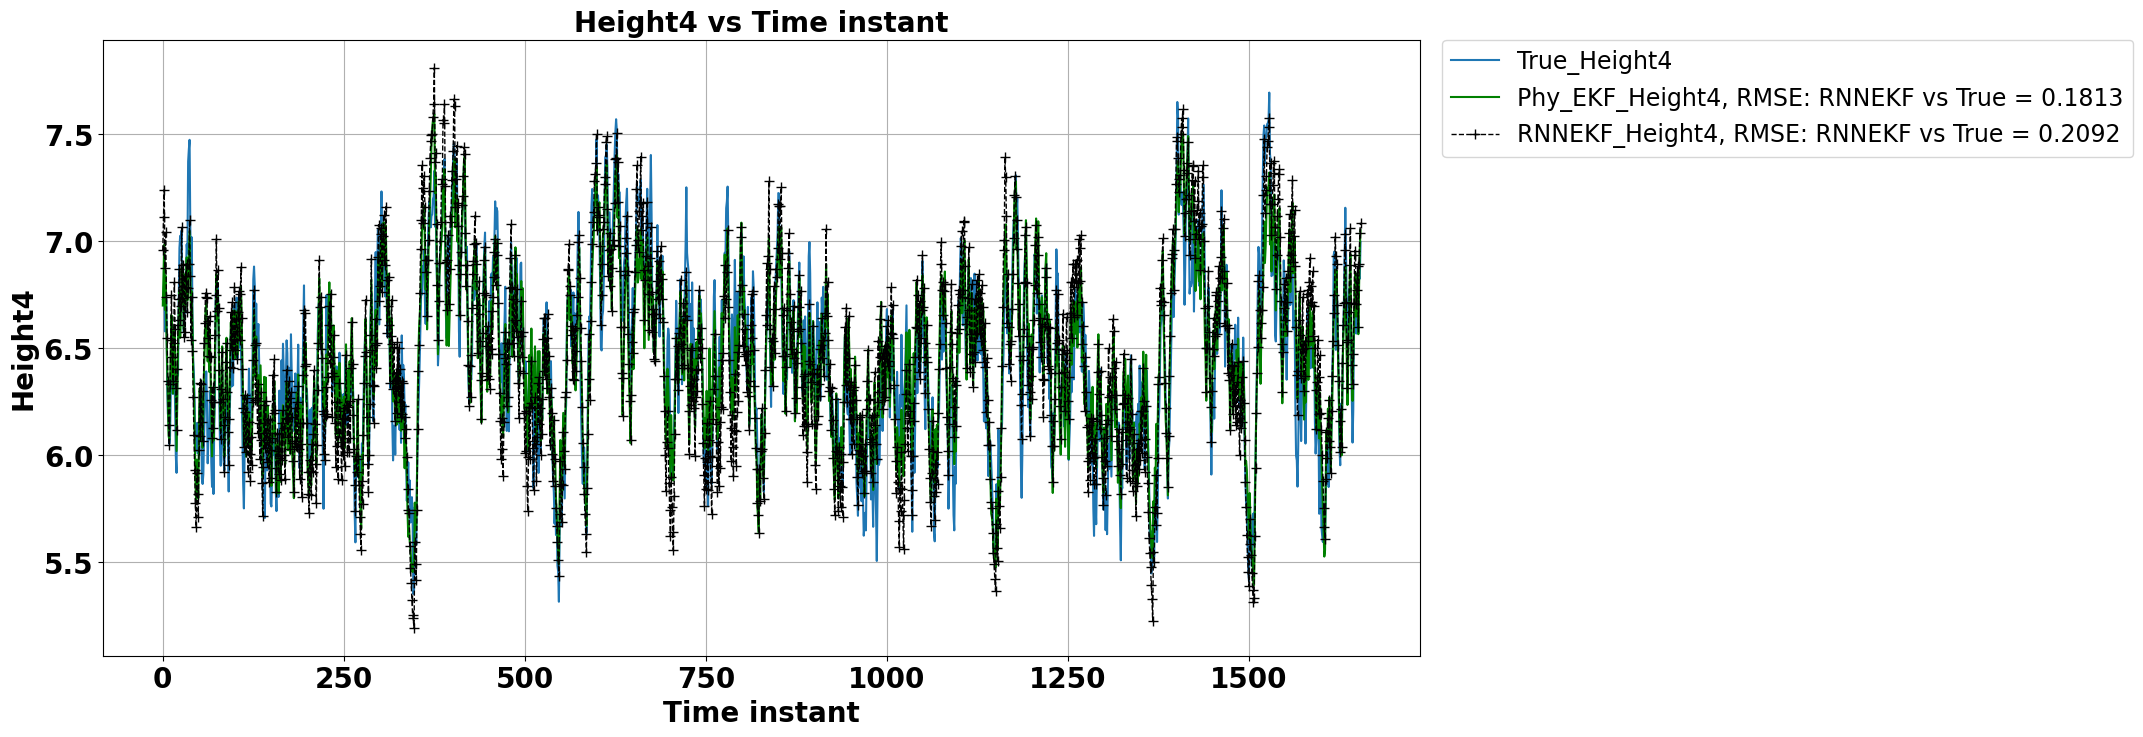

In [56]:
time = np.arange(0,len(x_est_app2[:1656,0]))

plt.figure(figsize=(17,8))
plt.plot(time,outputnew_noisy[:1655,0],label='True_Height1')
plt.plot(time,plantnew[:1655,0],label='Plant_Height1')
plt.plot(time,mech_EKF_result[:1655,0],label='Phy_EKF_Height1, RMSE: RNNEKF vs True = {0:.4f}'.format(RMSE_phyEKF_height1))
plt.plot(time,x_est_app2[:1655,0],'k+--',label='RNNEKF_Height1, RMSE: RNNEKF vs True = {0:.4f}'.format(RMSE_height1),linewidth=1,markersize=7.5)
plt.legend(bbox_to_anchor=(1.55, 0.739),loc='lower right',fontsize=17)
plt.xticks(fontsize=20, fontweight='bold')
plt.yticks(fontsize=20, fontweight='bold')
plt.grid()
plt.xlabel('Time instant',fontsize=20, fontweight='bold')
plt.ylabel('Height 1',fontsize=20, fontweight='bold')
plt.title('Height1 vs Time instant',fontsize=20, fontweight='bold')

plt.figure(figsize=(17,8))
plt.plot(time,outputnew_noisy[:1655,1],label='True_Height2')
plt.plot(time,plantnew[:1655,1],label='Plant_Height2')
plt.plot(time,mech_EKF_result[:1655,1],label='Phy_EKF_Height2, RMSE: RNNEKF vs True = {0:.4f}'.format(RMSE_phyEKF_height2))
plt.plot(time,x_est_app2[:1656,1],'k+--',label='RNNEKF_Height2, RMSE: RNNEKF vs True = {0:.4f}'.format(RMSE_height2),linewidth=1,markersize=7.5)
plt.legend(bbox_to_anchor=(1.55, 0.739),loc='lower right',fontsize=17)
plt.xticks(fontsize=20, fontweight='bold')
plt.yticks(fontsize=20, fontweight='bold')
plt.grid()
plt.xlabel('Time instant',fontsize=20, fontweight='bold')
plt.ylabel('Height2',fontsize=20, fontweight='bold')
plt.title('Height2 vs Time instant',fontsize=20, fontweight='bold')

plt.figure(figsize=(17,8))
plt.plot(time,outputnew_noisy[:1655,2],label='True_Height3')
plt.plot(time,mech_EKF_result[:1655,2],label='Phy_EKF_Height3, RMSE: RNNEKF vs True = {0:.4f}'.format(RMSE_phyEKF_height3),c='g')
plt.plot(time,x_est_app2[:1655,2],'k+--',label='RNNEKF_Height3, RMSE: RNNEKF vs True = {0:.4f}'.format(RMSE_height3),linewidth=1,markersize=7.5)
plt.legend(bbox_to_anchor=(1.55, 0.79),loc='lower right',fontsize=17)
plt.xticks(fontsize=20, fontweight='bold')
plt.yticks(fontsize=20, fontweight='bold')
plt.grid()
plt.xlabel('Time instant',fontsize=20, fontweight='bold')
plt.ylabel('Height3',fontsize=20, fontweight='bold')
plt.title('Height3 vs Time instant',fontsize=20, fontweight='bold')

plt.figure(figsize=(17,8))
plt.plot(time,outputnew_noisy[:1655,3],label='True_Height4')
plt.plot(time,mech_EKF_result[:1655,3],label='Phy_EKF_Height4, RMSE: RNNEKF vs True = {0:.4f}'.format(RMSE_phyEKF_height4),c='g')
plt.plot(time,x_est_app2[:1655,3],'k+--',label='RNNEKF_Height4, RMSE: RNNEKF vs True = {0:.4f}'.format(RMSE_height4),linewidth=1,markersize=7.5)
plt.legend(bbox_to_anchor=(1.55, 0.79),loc='lower right',fontsize=17)
plt.xticks(fontsize=20, fontweight='bold')
plt.yticks(fontsize=20, fontweight='bold')
plt.grid()
plt.xlabel('Time instant',fontsize=20, fontweight='bold')
plt.ylabel('Height4',fontsize=20, fontweight='bold')
plt.title('Height4 vs Time instant',fontsize=20, fontweight='bold')